<a href="https://colab.research.google.com/github/pragyaCodes7/Depression-Detection-Model/blob/main/DepressionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# setting a random seed
import numpy as np
np.random.seed(123)

In [ ]:
# setting the style options
import pandas as pd
import glob,os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting the display
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',None)
# setting the inf values to nan
pd.set_option('mode.use_inf_as_na',True)
# turning off scientific notation
pd.set_option('display.float_format',lambda x:'%.3f'%x)

**Target**


---


The files for calculating the target variable of depression can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Mental Health - Depression Screener".

In [ ]:
# combining the files into a dataframe
def glob_concat(path,file_str):
    files=glob.glob(os.path.join(path,file_str))
    display(files)
    df_files=[pd.read_sas(file) for file in files]
    combined_df=pd.concat(df_files)
    combined_df.SEQN=combined_df.SEQN.astype('int64')
    combined_df.set_index('SEQN',verify_integrity=True,inplace=True)
    return combined_df

In [ ]:
# combining the files into a dataframe
path=r'sample_data/target'
df_target=glob_concat(path,'*.XPT')

['sample_data/target/DPQ_H.XPT',
 'sample_data/target/DPQ_I.XPT',
 'sample_data/target/DPQ_D.XPT',
 'sample_data/target/DPQ_E.XPT',
 'sample_data/target/DPQ_G.XPT',
 'sample_data/target/DPQ_J.XPT',
 'sample_data/target/DPQ_F.XPT']

In [ ]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  DPQ100
SEQN                                                                                 
73557   1.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   1.000
73558   2.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
73559   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000     NaN
73561   2.000   1.000   0.000   3.000   3.000   0.000   0.000   0.000   0.000   1.000
73562   3.000   3.000   3.000   3.000   3.000   1.000   2.000   1.000   0.000   3.000

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40496 entries, 73557 to 62160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36471 non-null  float64
 1   DPQ020  36465 non-null  float64
 2   DPQ030  36463 non-null  float64
 3   DPQ040  36458 non-null  float64
 4   DPQ050  36458 non-null  float64
 5   DPQ060  36455 non-null  float64
 6   DPQ070  36453 non-null  float64
 7   DPQ080  36452 non-null  float64
 8   DPQ090  36447 non-null  float64
 9   DPQ100  24449 non-null  float64
dtypes: float64(10)
memory usage: 3.4 MB


In [ ]:
# dropping the final column
df_target.drop(columns=['DPQ100'],inplace=True)

In [ ]:
# removing the null values
df_target.dropna(inplace=True)

In [ ]:
# removing the ambiguous values 7 and 9
df_target=df_target[(df_target!=7)&(df_target!=9)]

In [ ]:
# removing the null values
df_target.dropna(inplace=True)

In [ ]:
# casting the column values as int
df_target=df_target.astype('int64')

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 73557 to 62160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DPQ010  36259 non-null  int64
 1   DPQ020  36259 non-null  int64
 2   DPQ030  36259 non-null  int64
 3   DPQ040  36259 non-null  int64
 4   DPQ050  36259 non-null  int64
 5   DPQ060  36259 non-null  int64
 6   DPQ070  36259 non-null  int64
 7   DPQ080  36259 non-null  int64
 8   DPQ090  36259 non-null  int64
dtypes: int64(9)
memory usage: 2.8 MB


In [ ]:
# summing the entries across each row
df_target['Total']=df_target.sum(axis=1)

In [ ]:
# creating the target column
df_target['depression']=df_target.Total.apply(lambda x:'Not Depressed' if x<10 else 'Depressed')

In [ ]:
df_target.head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  Total     depression
SEQN                                                                                               
73557       1       0       0       0       0       0       0       0       0      1  Not Depressed
73558       2       0       0       0       0       0       0       0       0      2  Not Depressed
73559       0       0       0       0       0       0       0       0       0      0  Not Depressed
73561       2       1       0       3       3       0       0       0       0      9  Not Depressed
73562       3       3       3       3       3       1       2       1       0     19      Depressed

In [ ]:
# slicing out the target column into a dataframe
target_clean=pd.DataFrame(df_target['depression'])

In [ ]:
target_clean.head()

depression
SEQN                
73557  Not Depressed
73558  Not Depressed
73559  Not Depressed
73561  Not Depressed
73562      Depressed

**Demographic Data**


---


The files for demographic data can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Demographics Data", and clicking the link for the XPT file next to "Demographic Variables and Sample Weights". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

In [ ]:
# combining the files
path=r'sample_data/demographic'
df_demo=glob_concat(path,'*.XPT')

['sample_data/demographic/DEMO_F.XPT',
 'sample_data/demographic/DEMO_D.XPT',
 'sample_data/demographic/DEMO_H.XPT',
 'sample_data/demographic/DEMO_J.XPT',
 'sample_data/demographic/DEMO_E.XPT',
 'sample_data/demographic/DEMO_G.XPT',
 'sample_data/demographic/DEMO_I.XPT']

In [ ]:
df_demo.head()

SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  ...  DMDHREDZ  DMDHRMAZ  DMDHSEDZ  RIDEXAGY
SEQN                                           ...                                        
51624     6.000     2.000     1.000     1.000  ...       NaN       NaN       NaN       NaN
51625     6.000     2.000     2.000     1.000  ...       NaN       NaN       NaN       NaN
51626     6.000     2.000     1.000     1.000  ...       NaN       NaN       NaN       NaN
51627     6.000     2.000     1.000     1.000  ...       NaN       NaN       NaN       NaN
51628     6.000     2.000     2.000     2.000  ...       NaN       NaN       NaN       NaN

[5 rows x 61 columns]

In [ ]:
# listing the columns to keep
demo_tokeep=['DMDBORN','DMDBORN2','DMDBORN4','DMDCITZN','DMDEDUC2','DMDHHSIZ','DMDMARTL','DMQMILIT','DMQMILIZ',
             'INDHHIN2','INDHHINC','RIAGENDR','RIDAGEYR','RIDEXPRG','RIDRETH1']

In [ ]:
# creating a dataframe with the columns
def cols_tokeep(df,col_list):
    df_copy=df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col],inplace=True)
        else:
            pass
    return df_copy

In [ ]:
# creating a dataframe with the columns
demo_clean=cols_tokeep(df_demo,demo_tokeep)

In [ ]:
demo_clean.head()

RIAGENDR  RIDAGEYR  RIDRETH1  DMQMILIT  ...  DMDBORN  INDHHINC  DMQMILIZ  DMDBORN4
SEQN                                           ...                                       
51624     1.000    34.000     3.000     2.000  ...      NaN       NaN       NaN       NaN
51625     1.000     4.000     5.000       NaN  ...      NaN       NaN       NaN       NaN
51626     1.000    16.000     4.000       NaN  ...      NaN       NaN       NaN       NaN
51627     1.000    10.000     4.000       NaN  ...      NaN       NaN       NaN       NaN
51628     2.000    60.000     4.000     2.000  ...      NaN       NaN       NaN       NaN

[5 rows x 15 columns]

In [ ]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 51624 to 93702
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  70190 non-null  float64
 1   RIDAGEYR  70190 non-null  float64
 2   RIDRETH1  70190 non-null  float64
 3   DMQMILIT  18934 non-null  float64
 4   DMDBORN2  20686 non-null  float64
 5   DMDCITZN  70163 non-null  float64
 6   DMDEDUC2  39749 non-null  float64
 7   DMDMARTL  41468 non-null  float64
 8   DMDHHSIZ  70190 non-null  float64
 9   INDHHIN2  58628 non-null  float64
 10  RIDEXPRG  10901 non-null  float64
 11  DMDBORN   10348 non-null  float64
 12  INDHHINC  10216 non-null  float64
 13  DMQMILIZ  24421 non-null  float64
 14  DMDBORN4  39156 non-null  float64
dtypes: float64(15)
memory usage: 8.6 MB


In [ ]:
# filling the null values
demo_clean.DMDBORN.fillna(0,inplace=True)
demo_clean.DMDBORN2.fillna(0,inplace=True)
demo_clean.DMDBORN4.fillna(0,inplace=True)
demo_clean.DMQMILIT.fillna(0,inplace=True)
demo_clean.DMQMILIZ.fillna(0,inplace=True)
demo_clean.INDHHINC.fillna(0,inplace=True)
demo_clean.INDHHIN2.fillna(0,inplace=True)

In [ ]:
# adding the columns
demo_clean['birth_place']=demo_clean['DMDBORN']+demo_clean['DMDBORN2']+demo_clean['DMDBORN4']
demo_clean['veteran']=demo_clean['DMQMILIT']+demo_clean['DMQMILIZ']
demo_clean['household_income']=demo_clean['INDHHINC']+demo_clean['INDHHIN2']

In [ ]:
# dropping the old columns
demo_clean.drop(columns=['DMDBORN','DMDBORN2','DMDBORN4'],inplace=True)
demo_clean.drop(columns=['DMQMILIT','DMQMILIZ'],inplace=True)
demo_clean.drop(columns=['INDHHINC','INDHHIN2'],inplace=True)

In [ ]:
# renaming the columns
demo_clean.rename(columns={'DMDCITZN':'citizenship','DMDEDUC2':'education_level','DMDHHSIZ':'household_size',
                           'DMDMARTL':'marital_status','RIAGENDR':'gender','RIDAGEYR':'age','RIDEXPRG':'pregnant',
                           'RIDRETH1':'race'},inplace=True)

In [ ]:
# changing the colmumn values
demo_clean['gender'].replace({2.000:1,1.000:0},inplace=True)
demo_clean['race'].replace({1.000:'Mexican',2.000:'Other Hispanic',3.000:'White',4.000:'Black',
                            5.000:'Other and Multiracial'},inplace=True)
demo_clean['citizenship'].replace({1.000:'Citizen',2.000:'Not Citizen',7.000:'Missing',9.000:'Missing'},inplace=True)
demo_clean['education_level'].replace({7.000: 0,9.000: 0},inplace=True)
demo_clean['marital_status'].replace({1.000:'Married',2.000:'Widowed',3.000:'Divorced',4.000:'Separated',
                                      5.000:'Never Married',6.000:'Partner',77.000:'Missing',99.000:'Missing'},
                                      inplace=True)
demo_clean['pregnant'].replace({1.000:'Yes',2.000:'No',3.000:'Missing'},inplace=True)
demo_clean['birth_place'].replace({1.000:'USA',2.000:'Mexico',3.000:'Elsewhere',4.000:'Other Spanish Country',
                                   5.000:'Other Non Spanish Country',7.000:'Missing',9.000:'Missing',77.000:'Missing',
                                   99.000:'Missing'},inplace=True)
demo_clean['veteran'].replace({1.000:'Yes',2.000:'No',7.000:'Missing',9.000:'Missing',0.000:'Missing'},inplace=True)
demo_clean['household_income'].replace({12.000:5,13.000:4,14.000:11,15.000:12,77.000:0,99.000:0},inplace=True)

In [ ]:
# filling the null values
demo_clean['citizenship'].fillna('Missing',inplace=True)
demo_clean['education_level'].fillna(0,inplace=True)
demo_clean['marital_status'].fillna('Missing',inplace=True)
demo_clean['pregnant'].fillna('Missing',inplace=True)
demo_clean['birth_place'].fillna('Missing',inplace=True)

In [ ]:
# casting the column values as int
demo_clean['gender']=demo_clean['gender'].astype('int64')
demo_clean['age']=demo_clean['age'].astype('int64')
demo_clean['education_level']=demo_clean['education_level'].astype('int64')
demo_clean['household_size']=demo_clean['household_size'].astype('int64')
demo_clean['household_income']=demo_clean['household_income'].astype('int64')

In [ ]:
demo_clean.head()

gender  age                   race  ... birth_place  veteran household_income
SEQN                                       ...                                      
51624       0   34                  White  ...         USA       No                6
51625       0    4  Other and Multiracial  ...         USA  Missing                5
51626       0   16                  Black  ...         USA  Missing                8
51627       0   10                  Black  ...         USA  Missing                5
51628       1   60                  Black  ...         USA       No                3

[5 rows x 11 columns]

In [ ]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 51624 to 93702
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            70190 non-null  int64 
 1   age               70190 non-null  int64 
 2   race              70190 non-null  object
 3   citizenship       70190 non-null  object
 4   education_level   70190 non-null  int64 
 5   marital_status    70190 non-null  object
 6   household_size    70190 non-null  int64 
 7   pregnant          70190 non-null  object
 8   birth_place       70190 non-null  object
 9   veteran           70190 non-null  object
 10  household_income  70190 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.4+ MB


**Occupation**


---


The files for data on occupation can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Occupation". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

In [ ]:
# combining the files
path=r'sample_data/occupation'
df_occupation=glob_concat(path,'*.XPT')

['sample_data/occupation/OCQ_H.XPT',
 'sample_data/occupation/OCQ_I.XPT',
 'sample_data/occupation/OCQ_D.XPT',
 'sample_data/occupation/OCQ_F.XPT',
 'sample_data/occupation/OCQ_E.XPT',
 'sample_data/occupation/OCQ_J.XPT',
 'sample_data/occupation/OCQ_G.XPT']

In [ ]:
df_occupation.head()

OCD150  OCQ180  OCQ210  OCD231  OCD241  ...  OCQ560  OCQ570  OCQ580  OCQ670  OCQ275
SEQN                                           ...                                        
73557   4.000     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN
73558   1.000  50.000     NaN   8.000  16.000  ...     NaN     NaN     NaN     NaN     NaN
73559   4.000     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN
73561   4.000     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN
73562   1.000  56.000     NaN   9.000  17.000  ...     NaN     NaN     NaN     NaN     NaN

[5 rows x 30 columns]

In [ ]:
# listing the columns to keep and creating a dataframe with them
occupation_tokeep=['OCQ210','OCQ260','OCD270','OCQ380']
occupation_clean=cols_tokeep(df_occupation,occupation_tokeep)

In [ ]:
occupation_clean.head()

OCQ210  OCQ260  OCD270  OCQ380
SEQN                                 
73557     NaN     NaN     NaN   3.000
73558     NaN   1.000 420.000     NaN
73559     NaN     NaN     NaN   3.000
73561     NaN     NaN     NaN   4.000
73562     NaN   2.000 372.000     NaN

In [ ]:
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 73557 to 71916
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OCQ210  7100 non-null   float64
 1   OCQ260  23643 non-null  float64
 2   OCD270  23643 non-null  float64
 3   OCQ380  19392 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [ ]:
# renaming the columns
occupation_clean.rename(columns={'OCQ210':'full_time_work','OCQ260':'work_type','OCD270':'time_in_current_job',
                                 'OCQ380':'out_of_work'},inplace=True)

In [ ]:
# changing the column values
occupation_clean['full_time_work'].replace({1.000:'Yes',2.000:'No',7.000:'Missing',9.000:'Missing'},inplace=True)
occupation_clean['work_type'].replace({1.000:'Private Wage Worker',2.000:'Government',3.000:'Government',
                                       4.000:'Government',5.000:'Self Employed',6.000:'Family Business',77.000:'Missing',
                                       99.000:'Missing'},inplace=True)
occupation_clean['time_in_current_job'].replace({77777.000:0,99999.000:0},inplace=True)
occupation_clean['out_of_work'].replace({1.000:'Home Caretaker',2.000:'School',3.000:'Retired',4.000:'Health',
                                         5.000:'Layoff',6.000:'Disabled',7.000:'Other',77.000:'Missing',99.000:'Missing'},
                                        inplace=True)

In [ ]:
# filling the null values
occupation_clean['time_in_current_job'].fillna(0,inplace=True)
occupation_clean.fillna('Missing',inplace=True)

In [ ]:
# casting the column as int
occupation_clean['time_in_current_job']=occupation_clean['time_in_current_job'].astype('int64')

In [ ]:
occupation_clean.head()

full_time_work            work_type  time_in_current_job out_of_work
SEQN                                                                      
73557        Missing              Missing                    0     Retired
73558        Missing  Private Wage Worker                  420     Missing
73559        Missing              Missing                    0     Retired
73561        Missing              Missing                    0      Health
73562        Missing           Government                  372     Missing

In [ ]:
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 73557 to 71916
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_time_work       44701 non-null  object
 1   work_type            44701 non-null  object
 2   time_in_current_job  44701 non-null  int64 
 3   out_of_work          44701 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


**Sleep Disorders**


---


The files for data on sleep disorders can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Sleep Disorders". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

In [ ]:
# combining the files
path=r'sample_data/sleep'
df_sleep=glob_concat(path,'*.XPT')

['sample_data/sleep/SLQ_E.XPT',
 'sample_data/sleep/SLQ_G.XPT',
 'sample_data/sleep/SLQ_H.XPT',
 'sample_data/sleep/SLQ_D.XPT',
 'sample_data/sleep/SLQ_J.XPT',
 'sample_data/sleep/SLQ_F.XPT',
 'sample_data/sleep/SLQ_I.XPT']

In [ ]:
df_sleep.head()

SLD010H  SLD020M  SLQ030  SLQ040  SLQ050  SLQ060  ...  SLQ300  SLQ310  SLD012  SLQ320  SLQ330  SLD013
SEQN                                                     ...                                                
41475    6.000   30.000   0.000   0.000   1.000   2.000  ...     NaN     NaN     NaN     NaN     NaN     NaN
41477    8.000   30.000   3.000   0.000   2.000   2.000  ...     NaN     NaN     NaN     NaN     NaN     NaN
41479    6.000   25.000   3.000   0.000   2.000   2.000  ...     NaN     NaN     NaN     NaN     NaN     NaN
41481    6.000   45.000   0.000   0.000   2.000   2.000  ...     NaN     NaN     NaN     NaN     NaN     NaN
41482    8.000    5.000   3.000   3.000   2.000   2.000  ...     NaN     NaN     NaN     NaN     NaN     NaN

[5 rows x 33 columns]

In [ ]:
# listing the columns to keep and creating a dataframe with them
sleep_tokeep=['SLQ050','SLD010H','SLD012']
sleep_clean=cols_tokeep(df_sleep,sleep_tokeep)

In [ ]:
sleep_clean.head()

SLD010H  SLQ050  SLD012
SEQN                          
41475    6.000   1.000     NaN
41477    8.000   2.000     NaN
41479    6.000   2.000     NaN
41481    6.000   2.000     NaN
41482    8.000   2.000     NaN

In [ ]:
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 41475 to 93702
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLD010H  32194 non-null  float64
 1   SLQ050   44700 non-null  float64
 2   SLD012   12407 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [ ]:
# filling the null values
sleep_clean.SLD010H.fillna(0,inplace=True)
sleep_clean.SLD012.fillna(0,inplace=True)

In [ ]:
# adding the columns
sleep_clean['sleep_hours']=sleep_clean['SLD010H']+sleep_clean['SLD012']

In [ ]:
# changing the column values
sleep_clean.sleep_hours.replace({77.000:0,99.000:0},inplace=True)

In [ ]:
# dropping the old columns
sleep_clean.drop(columns=['SLD010H','SLD012'], inplace=True)

In [ ]:
# renaming the column
sleep_clean.rename(columns={'SLQ050':'trouble_sleeping_history'}, inplace=True)

In [ ]:
# changing the column values
sleep_clean['trouble_sleeping_history'].replace({2.000:0,9.000:0,7.000:0},inplace=True)

In [ ]:
# filling the null values
sleep_clean.trouble_sleeping_history.fillna(0,inplace=True)

In [ ]:
# casting the column values as int
sleep_clean['trouble_sleeping_history']=sleep_clean['trouble_sleeping_history'].astype('int64')

In [ ]:
sleep_clean.head()

trouble_sleeping_history  sleep_hours
SEQN                                        
41475                         1        6.000
41477                         0        8.000
41479                         0        6.000
41481                         0        6.000
41482                         0        8.000

In [ ]:
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 41475 to 93702
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trouble_sleeping_history  44701 non-null  int64  
 1   sleep_hours               44701 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


**Alcohol Use**


---


The files gathered for data on alcohol use can be found on the NHANES website: https://wwwn.cdc.gov/nchs/nhanes/default.aspx. The exact files can be downloaded for each year group by selecting the year, choosing "Questionnaire Data", and clicking the link for the XPT file next to "Alcohol Use". Each column name can be looked up using the "Search Variables" tool on the NHANES website to see what the data represents.

In [ ]:
# combining the files
path=r'sample_data/alcohol'
df_alcohol=glob_concat(path,'*.XPT')

['sample_data/alcohol/ALQ_F.XPT',
 'sample_data/alcohol/ALQ_D.XPT',
 'sample_data/alcohol/ALQ_J.XPT',
 'sample_data/alcohol/ALQ_H.XPT',
 'sample_data/alcohol/ALQ_G.XPT',
 'sample_data/alcohol/ALQ_I.XPT',
 'sample_data/alcohol/ALQ_E.XPT']

In [ ]:
df_alcohol.head()

ALQ101  ALQ110  ALQ120Q  ALQ120U  ALQ130  ...  ALQ170  ALQ141Q  ALQ141U  ALQ160  ALQ155
SEQN                                             ...                                          
51624   1.000     NaN    0.000      NaN     NaN  ...     NaN      NaN      NaN     NaN     NaN
51628   2.000   1.000    0.000      NaN     NaN  ...     NaN      NaN      NaN     NaN     NaN
51629   1.000     NaN    4.000    2.000  19.000  ...     NaN      NaN      NaN     NaN     NaN
51630   1.000     NaN   20.000    3.000   2.000  ...     NaN      NaN      NaN     NaN     NaN
51633   1.000     NaN    1.000    1.000   1.000  ...     NaN      NaN      NaN     NaN     NaN

[5 rows x 20 columns]

In [ ]:
# listing the columns to keep and creating a dataframe with them
alcohol_tokeep=['ALQ120Q','ALQ120U','ALQ121','ALQ111','ALQ110','ALQ130']
alcohol_clean=cols_tokeep(df_alcohol,alcohol_tokeep)

In [ ]:
alcohol_clean.head()

ALQ110  ALQ120Q  ALQ120U  ALQ130  ALQ111  ALQ121
SEQN                                                   
51624     NaN    0.000      NaN     NaN     NaN     NaN
51628   1.000    0.000      NaN     NaN     NaN     NaN
51629     NaN    4.000    2.000  19.000     NaN     NaN
51630     NaN   20.000    3.000   2.000     NaN     NaN
51633     NaN    1.000    1.000   1.000     NaN     NaN

In [ ]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 51624 to 51623
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALQ110   9110 non-null   float64
 1   ALQ120Q  25724 non-null  float64
 2   ALQ120U  20087 non-null  float64
 3   ALQ130   23615 non-null  float64
 4   ALQ111   5130 non-null   float64
 5   ALQ121   4545 non-null   float64
dtypes: float64(6)
memory usage: 2.1 MB


In [ ]:
# filling the null values
alcohol_clean.ALQ110.fillna(0,inplace=True)
alcohol_clean.ALQ111.fillna(0,inplace=True)

In [ ]:
# adding the columns
alcohol_clean['lifetime_alcohol_consumption']=alcohol_clean['ALQ110']+alcohol_clean['ALQ111']

In [ ]:
# changing the column values
alcohol_clean.lifetime_alcohol_consumption.replace({1.000:'Yes',2.000:'No',7.000:'Missing',9.000:'Missing',
                                                    0.000:'Missing'},inplace=True)

In [ ]:
# dropping the old columns
alcohol_clean.drop(columns=['ALQ110','ALQ111'],inplace=True)

In [ ]:
# changing the column values
alcohol_clean.ALQ120U.replace({1.000:52,2.000:12,3.000:1},inplace=True)
alcohol_clean.ALQ120Q.replace({999.000:0,777.000:0},inplace=True)

In [ ]:
# filling the null values
alcohol_clean.ALQ120U.fillna(-1,inplace=True)
alcohol_clean.ALQ120Q.fillna(0,inplace=True)

In [ ]:
# multiplying the number of drinks with the unit of drinks
alcohol_clean['drinks_past_year']=alcohol_clean['ALQ120U']*alcohol_clean['ALQ120Q']

In [ ]:
# changing the column values
alcohol_clean.ALQ121.replace({1.000:365,2.000:312,3.000:182,4.000:104,5.000:52,6.000:30,7.000:12,8.000:9,9.000:5,
                              10.000:2,77.000:0,99.000:0},inplace=True)
alcohol_clean.ALQ130.replace({999.000:0,777.000:0},inplace=True)

In [ ]:
#filling the null values
alcohol_clean.ALQ121.fillna(0,inplace=True)
alcohol_clean.ALQ130.fillna(0,inplace=True)

In [ ]:
# adding the columns
alcohol_clean['drinks_past_year']=alcohol_clean['drinks_past_year']+alcohol_clean['ALQ121']

In [ ]:
# renaming the column
alcohol_clean.rename(columns={'ALQ130':'drinks_per_occasion'},inplace=True)

In [ ]:
# casting the column values as int
alcohol_clean['drinks_past_year']=alcohol_clean['drinks_past_year'].astype('int64')
alcohol_clean['drinks_per_occasion']=alcohol_clean['drinks_per_occasion'].astype('int64')

In [ ]:
# dropping the old columns
alcohol_clean.drop(columns=['ALQ120U','ALQ120Q','ALQ121'],inplace=True)

In [ ]:
alcohol_clean.head()

drinks_per_occasion lifetime_alcohol_consumption  drinks_past_year
SEQN                                                                     
51624                    0                      Missing                 0
51628                    0                          Yes                 0
51629                   19                      Missing                48
51630                    2                      Missing                20
51633                    1                      Missing                52

In [ ]:
alcohol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 51624 to 51623
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   drinks_per_occasion           39346 non-null  int64 
 1   lifetime_alcohol_consumption  39346 non-null  object
 2   drinks_past_year              39346 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
# combining the dataframes
full_df=pd.concat([target_clean,demo_clean,occupation_clean,sleep_clean,alcohol_clean],axis=1)

In [ ]:
# keeping only the entries that are not null for the target
full_df=full_df[full_df['depression'].notnull()]

In [ ]:
# filling in the null values
full_df['lifetime_alcohol_consumption'].fillna('Missing',inplace=True)
full_df.fillna(0,inplace=True)

In [ ]:
full_df.head()

depression  gender  ...  lifetime_alcohol_consumption drinks_past_year
SEQN                          ...                                               
73557  Not Depressed       0  ...                       Missing            1.000
73558  Not Depressed       0  ...                       Missing          364.000
73559  Not Depressed       0  ...                       Missing            0.000
73561  Not Depressed       1  ...                       Missing            0.000
73562      Depressed       0  ...                       Missing            5.000

[5 rows x 21 columns]

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 73557 to 62160
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   depression                    36259 non-null  object 
 1   gender                        36259 non-null  int64  
 2   age                           36259 non-null  int64  
 3   race                          36259 non-null  object 
 4   citizenship                   36259 non-null  object 
 5   education_level               36259 non-null  int64  
 6   marital_status                36259 non-null  object 
 7   household_size                36259 non-null  int64  
 8   pregnant                      36259 non-null  object 
 9   birth_place                   36259 non-null  object 
 10  veteran                       36259 non-null  object 
 11  household_income              36259 non-null  int64  
 12  full_time_work                36259 non-null  object 
 1

**Train Test Split**


---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# defining X and y
X=full_df.drop('depression',axis=1)
y=full_df['depression'].map({'Not Depressed':0,'Depressed':1})

In [ ]:
# performing the train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=123,stratify=y)

**Explore**


---



In [ ]:
# turning the data back into a dataframe
y_train_df=pd.DataFrame(y_train)
train_df=pd.concat([X_train,y_train_df],axis=1)

In [ ]:
def plotting_counts(df,col,target='depression'):
    order_list=list(df[col].unique())
    order_list.sort()
    fig,ax=plt.subplots(figsize=(16,8))
    x,y=col, target
    ax=sns.countplot(x=x,hue=y,data=df,order=order_list)
    plt.title(f'{col.title()} By Count {target.title()}',fontdict={'fontsize':30})
    plt.xlabel(f'{col.title()}',fontdict={'fontsize':20})
    plt.ylabel(f'{target.title()} Count',fontdict={'fontsize':20})
    plt.xticks(rotation=75)
    return fig,ax

In [ ]:
def plotting_percentages(df,col,target='depression'):
    x,y=col,target
    temp_df=df.groupby(x)[y].value_counts(normalize=True)
    temp_df=temp_df.mul(100).rename('percent').reset_index()
    order_list=list(df[col].unique())
    order_list.sort()
    sns.set(font_scale=1.5)
    g=sns.catplot(x=x,y='percent',hue=y,kind='bar',data=temp_df,height=8,aspect=2,order=order_list,legend_out=False)
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        txt=str(p.get_height().round(1))+'%'
        txt_x=p.get_x()
        txt_y=p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    plt.title(f'{col.title()} By Percent {target.title()}',fontdict={'fontsize':30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize':20})
    plt.ylabel(f'{target.title()} Percentage',fontdict={'fontsize':20})
    plt.xticks(rotation=75)
    return g

In [ ]:
def plot_num_cols(df, col, target='depression'):
    g=sns.catplot(x=target,y=col,data=df,kind='boxen',height=7,aspect=2)
    plt.suptitle(f'{col.title()} and {target.title()}',fontsize=30,y=1.05)

**Demographics**


---



In [ ]:
# listing the columns
demo_cat_cols=['gender','race','citizenship','education_level','marital_status','pregnant','birth_place','veteran',
               'household_size','household_income']
demo_num_cols=['age']

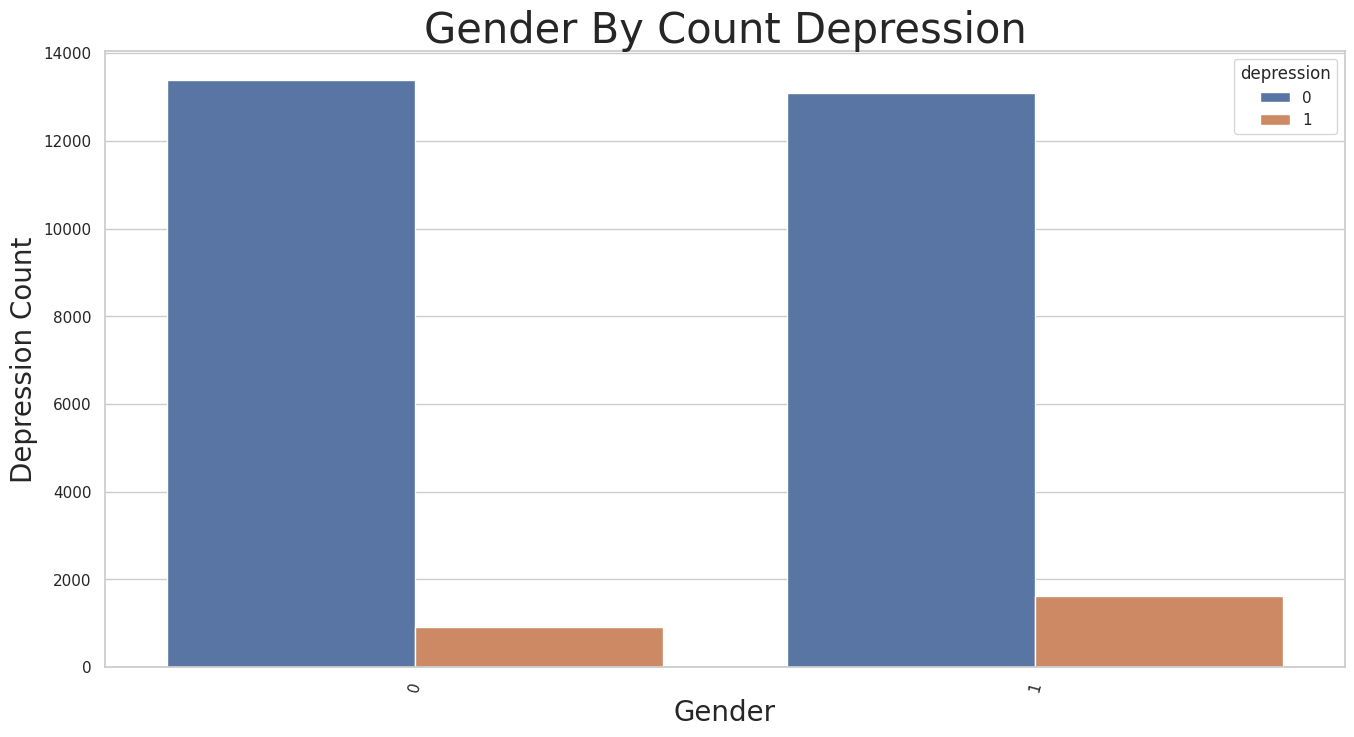

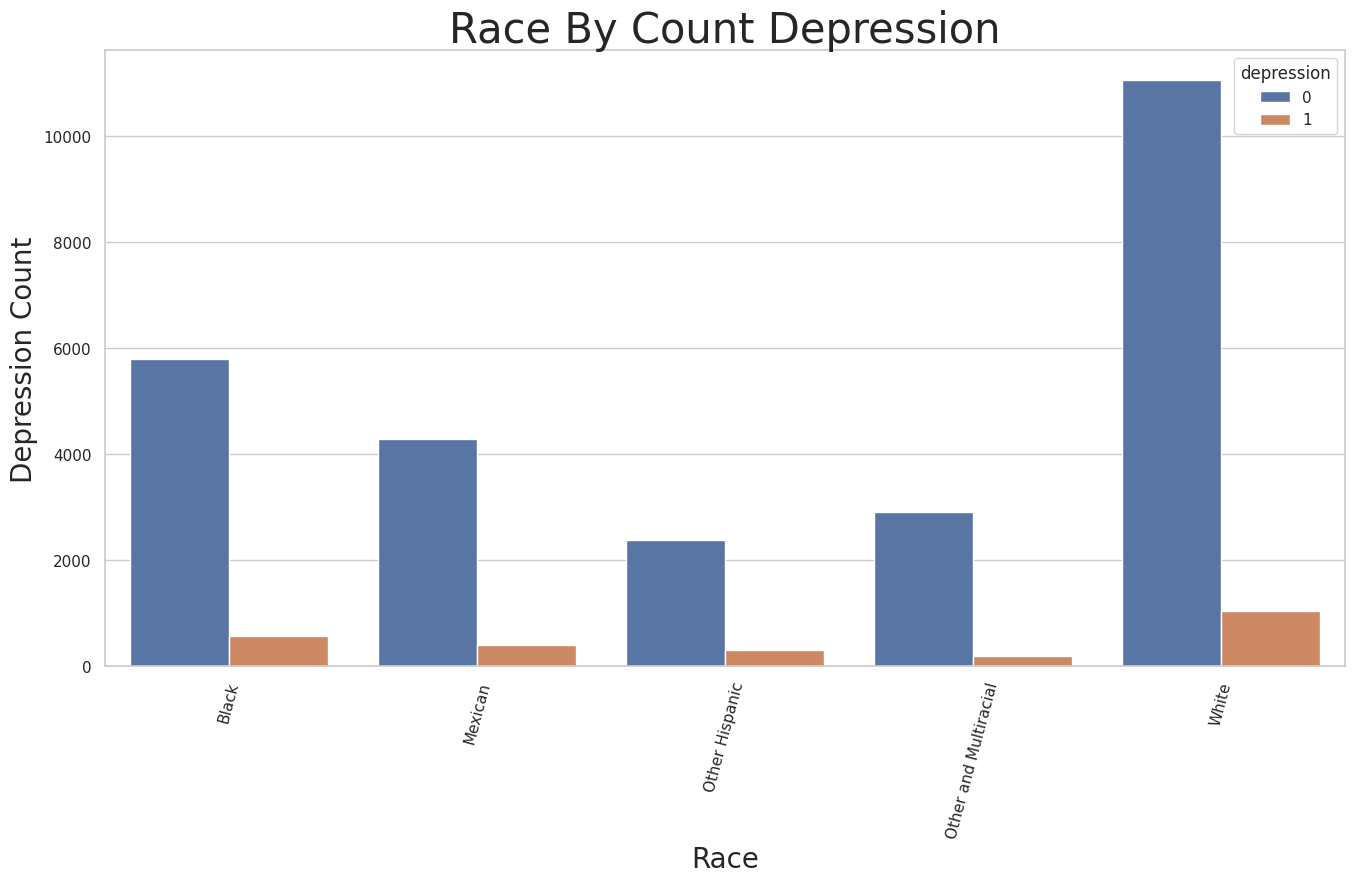

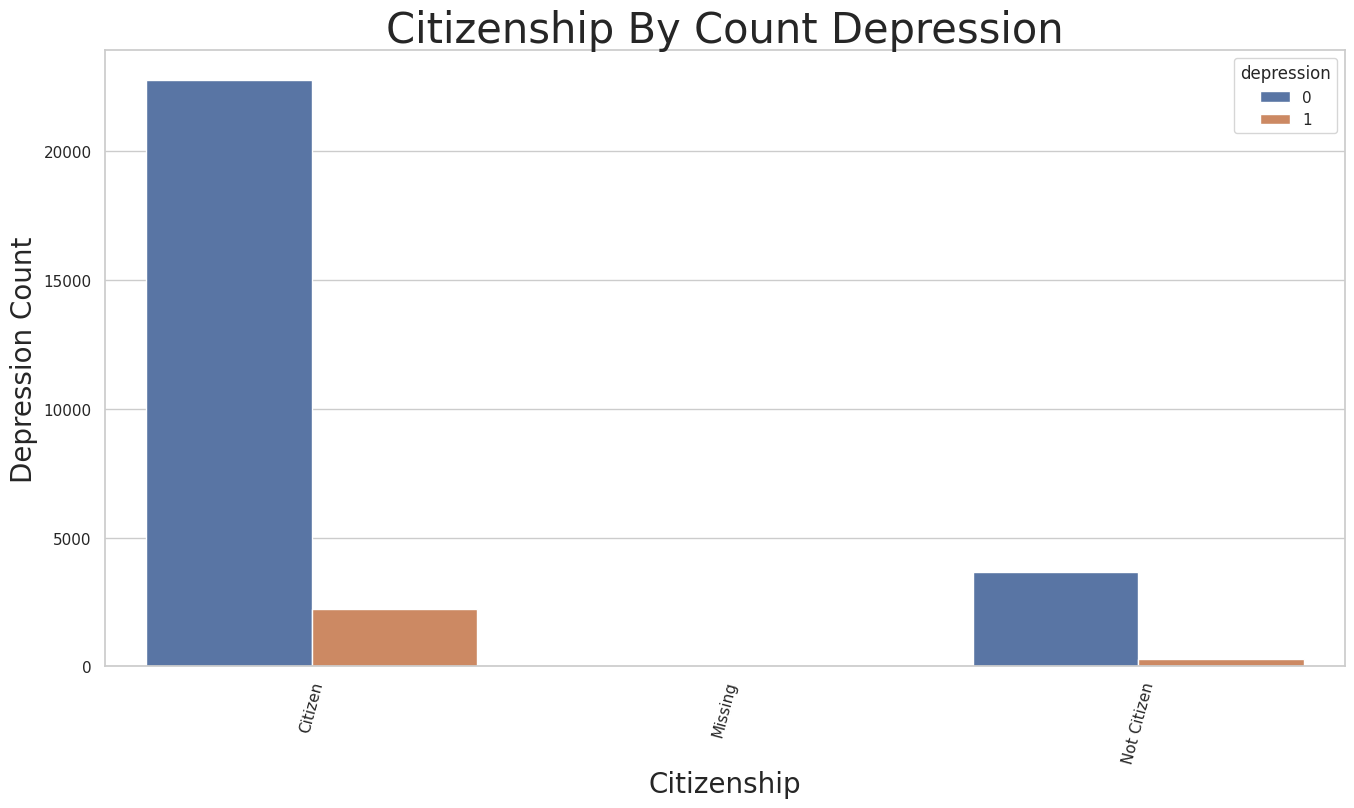

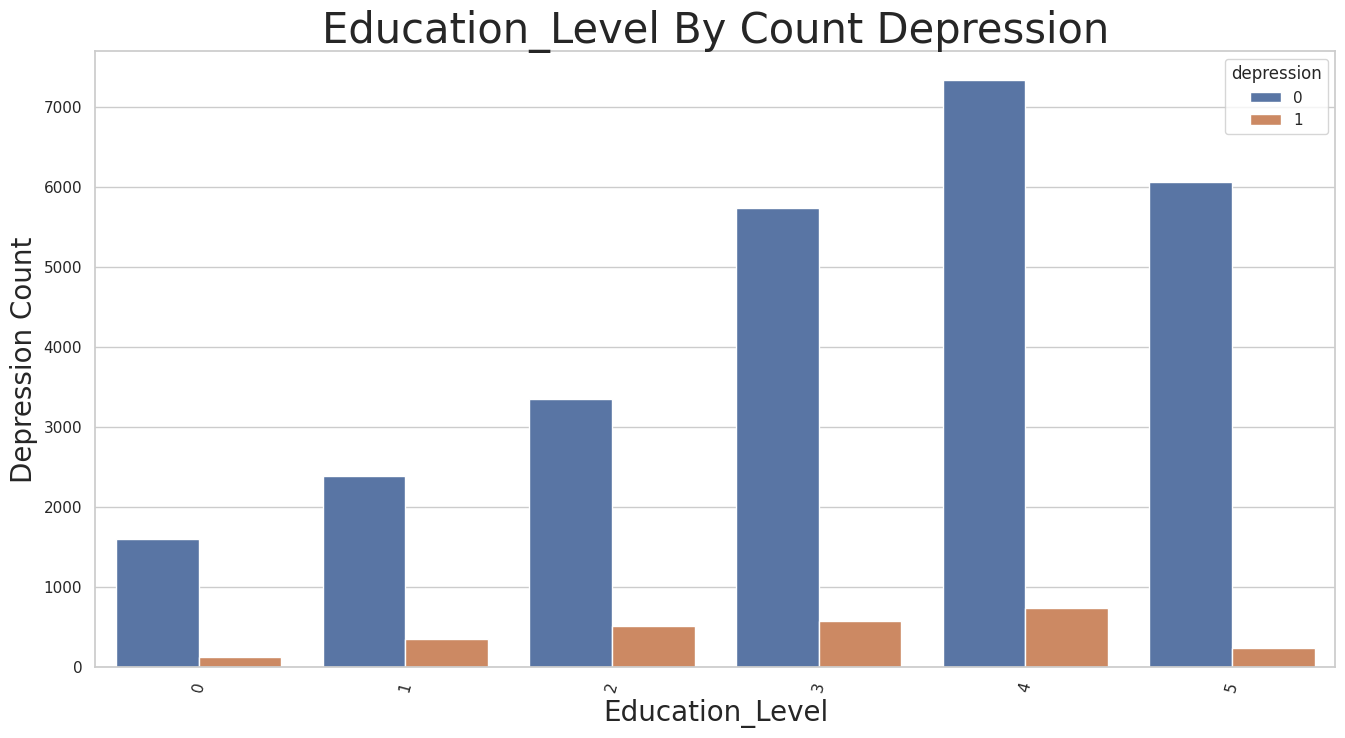

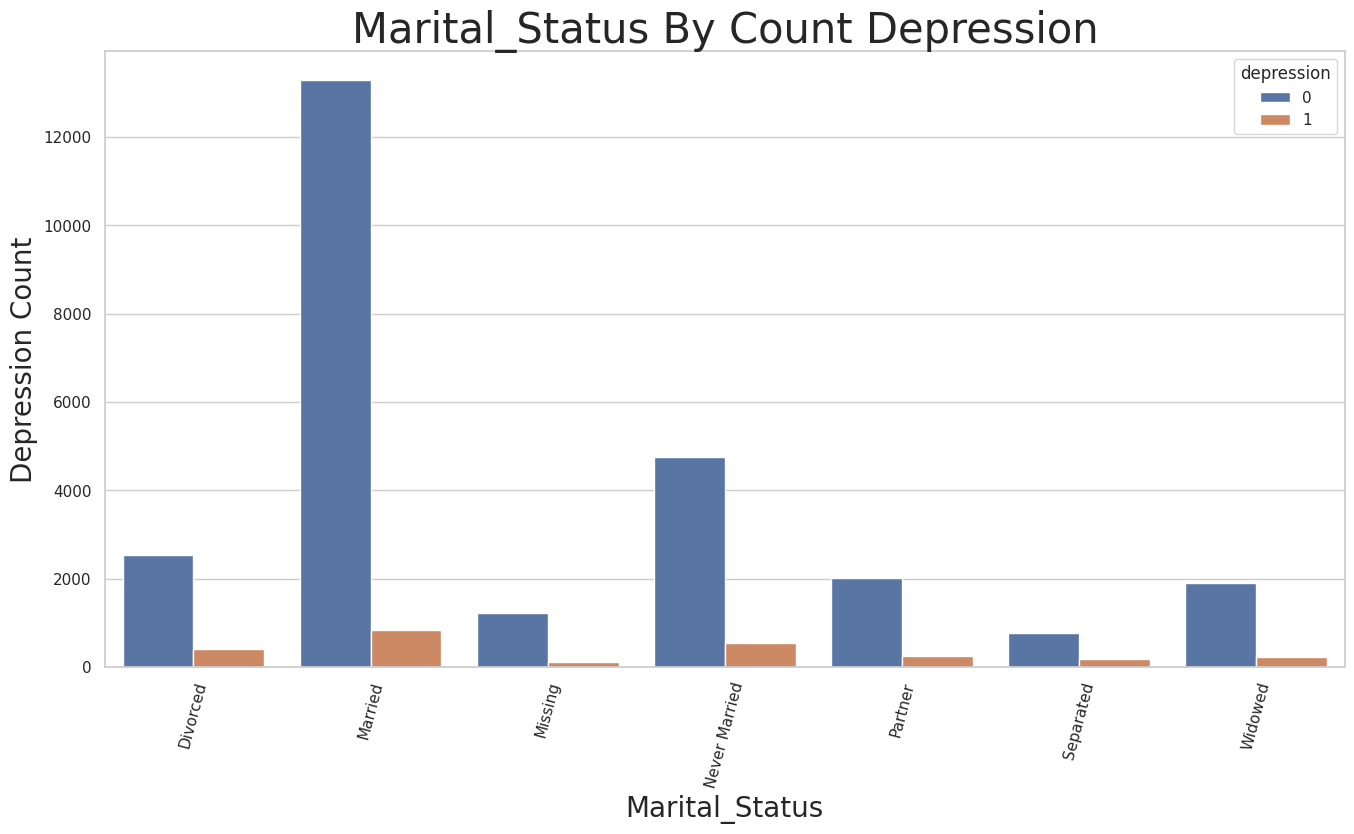

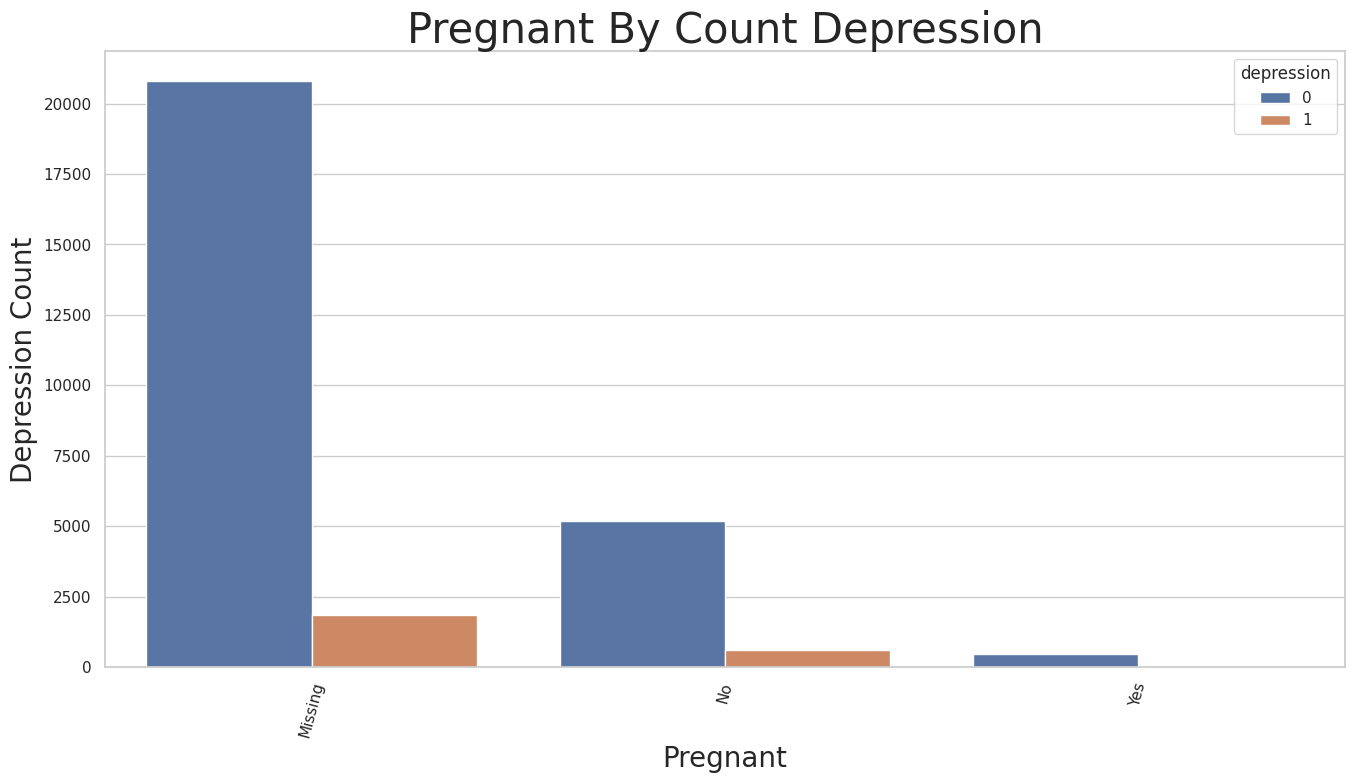

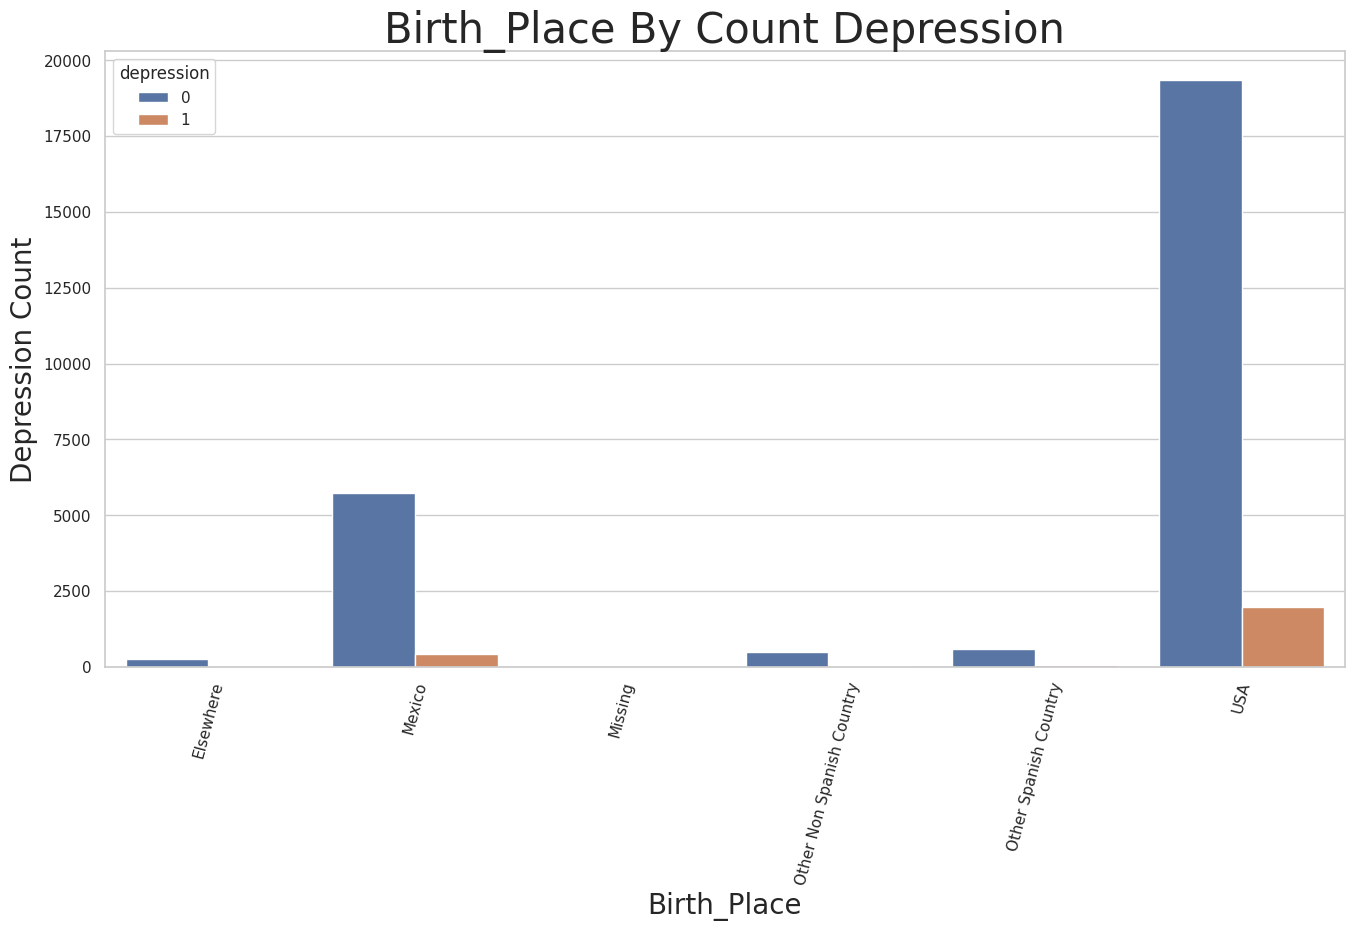

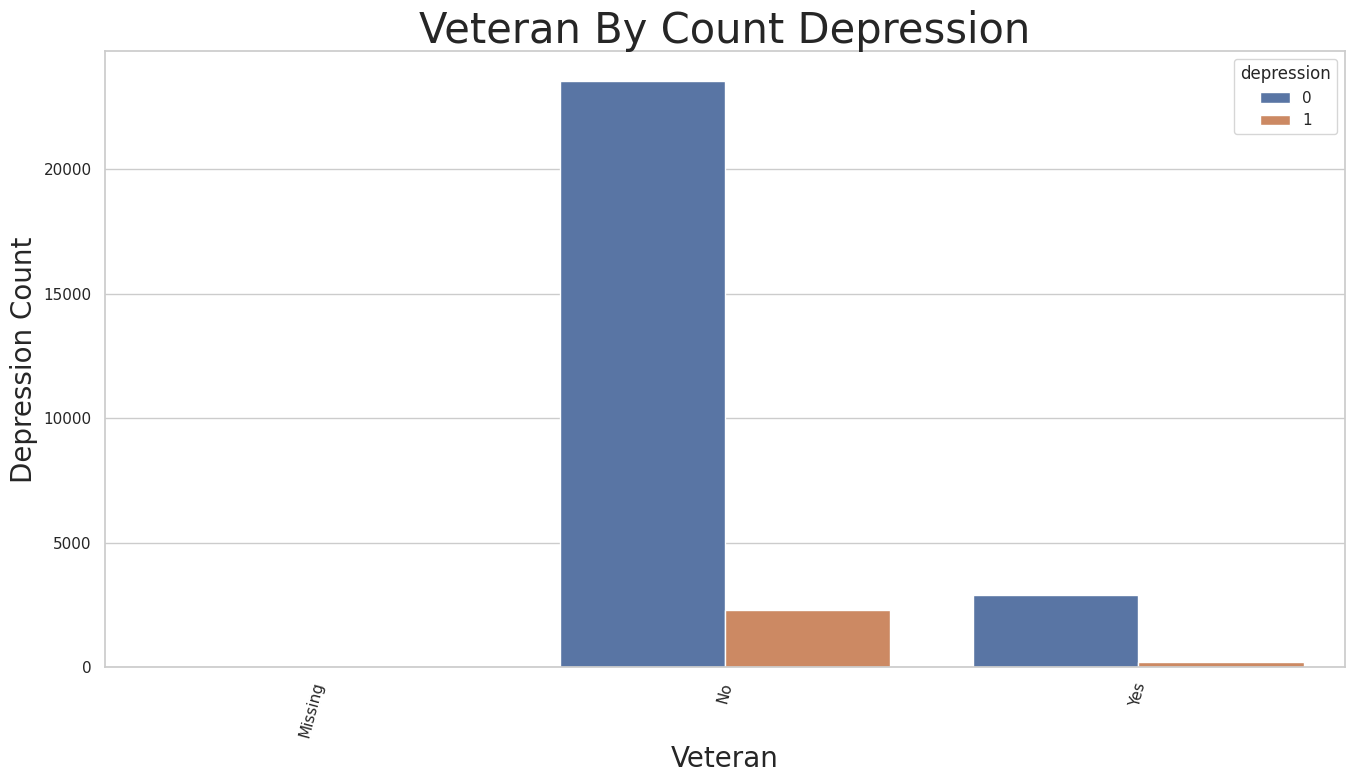

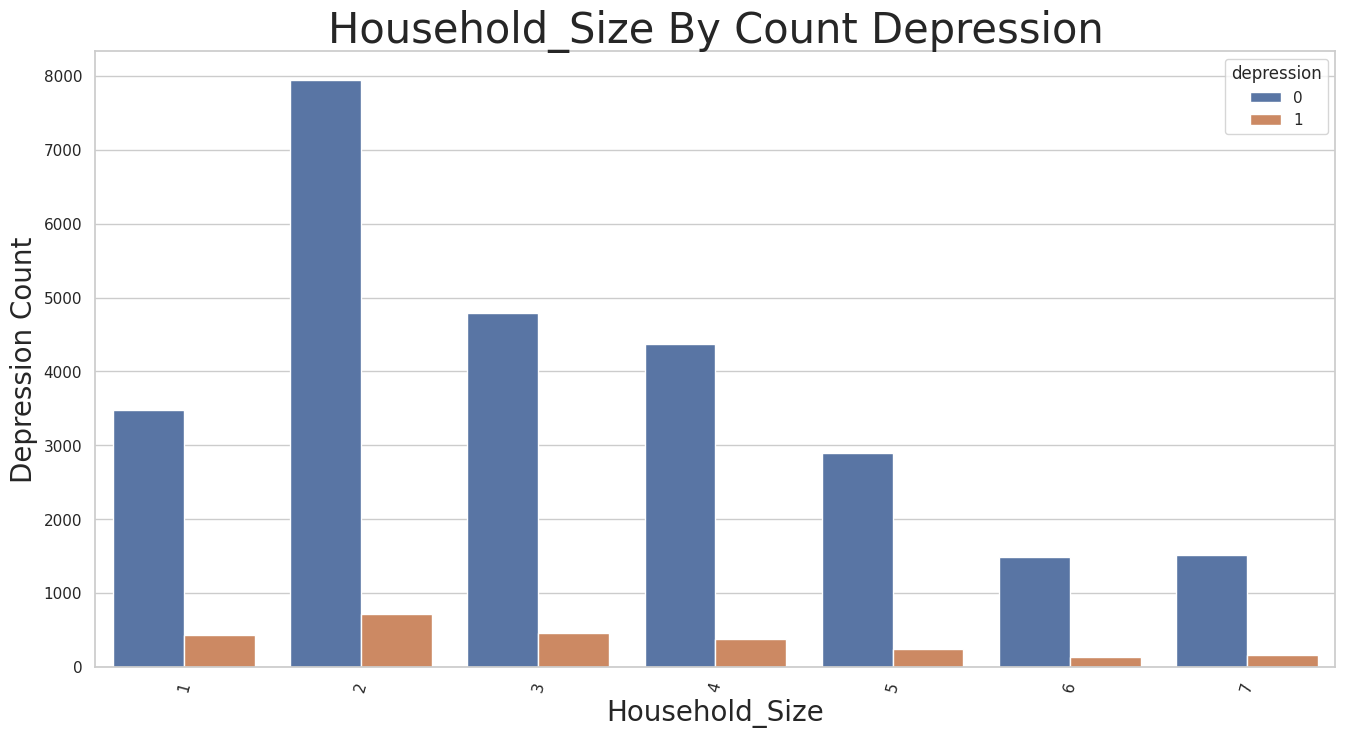

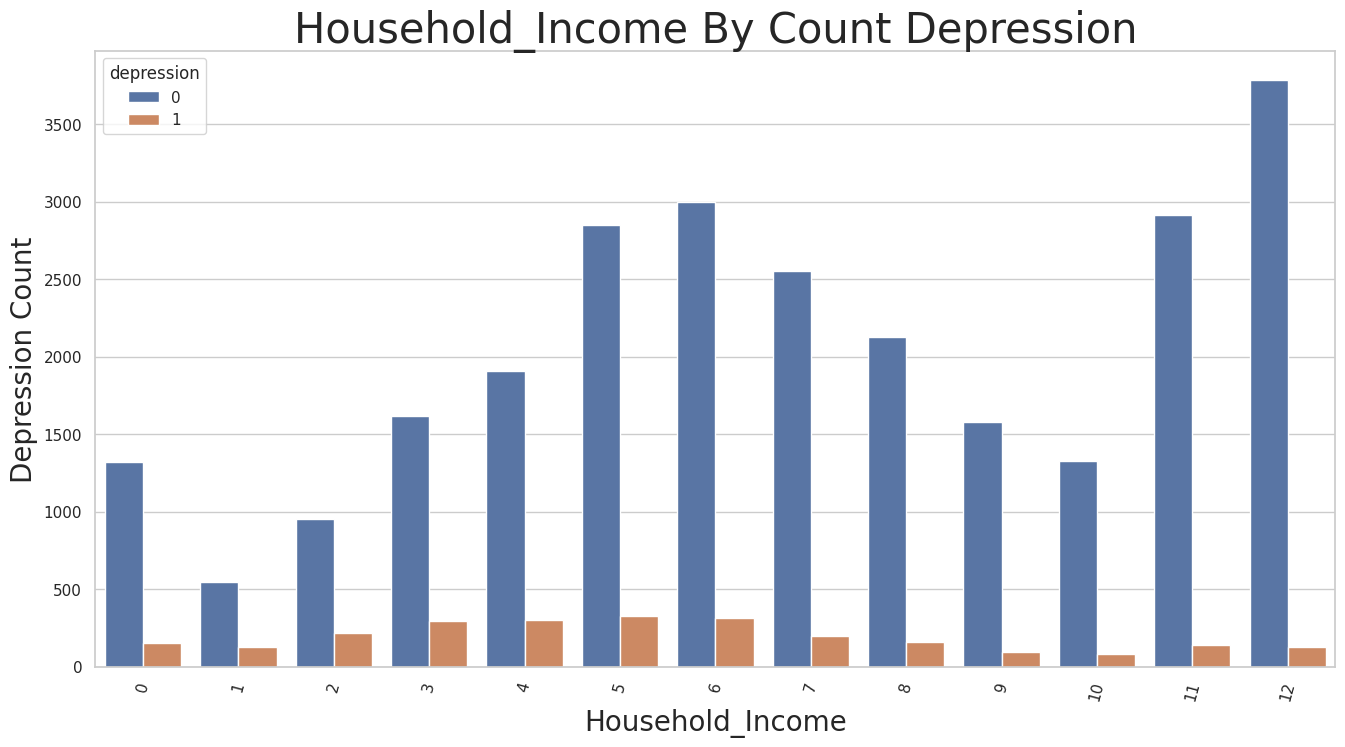

In [ ]:
# plotting the columns
for col in demo_cat_cols:
    plotting_counts(train_df,col)

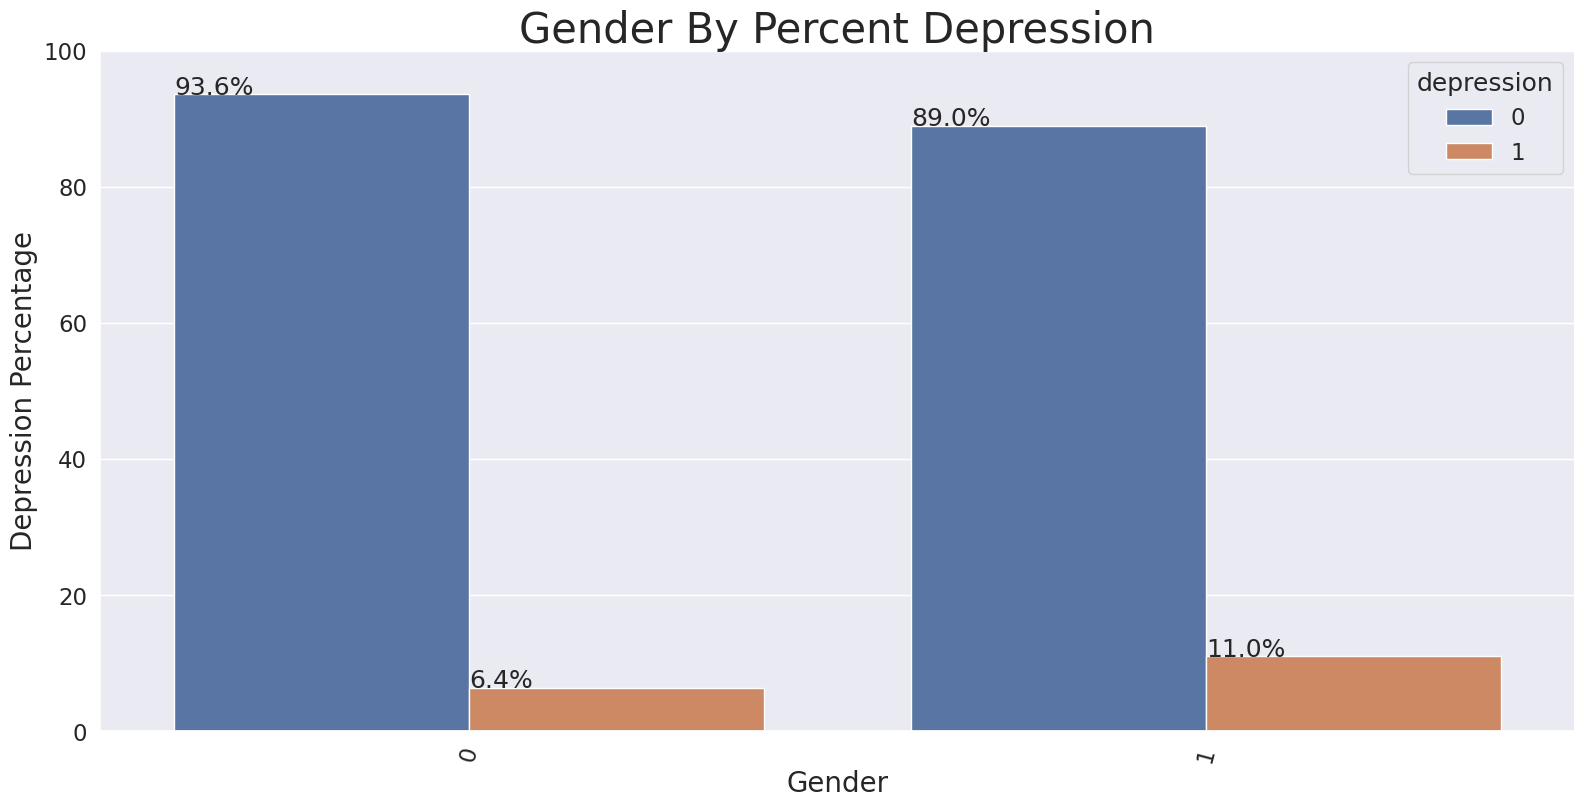

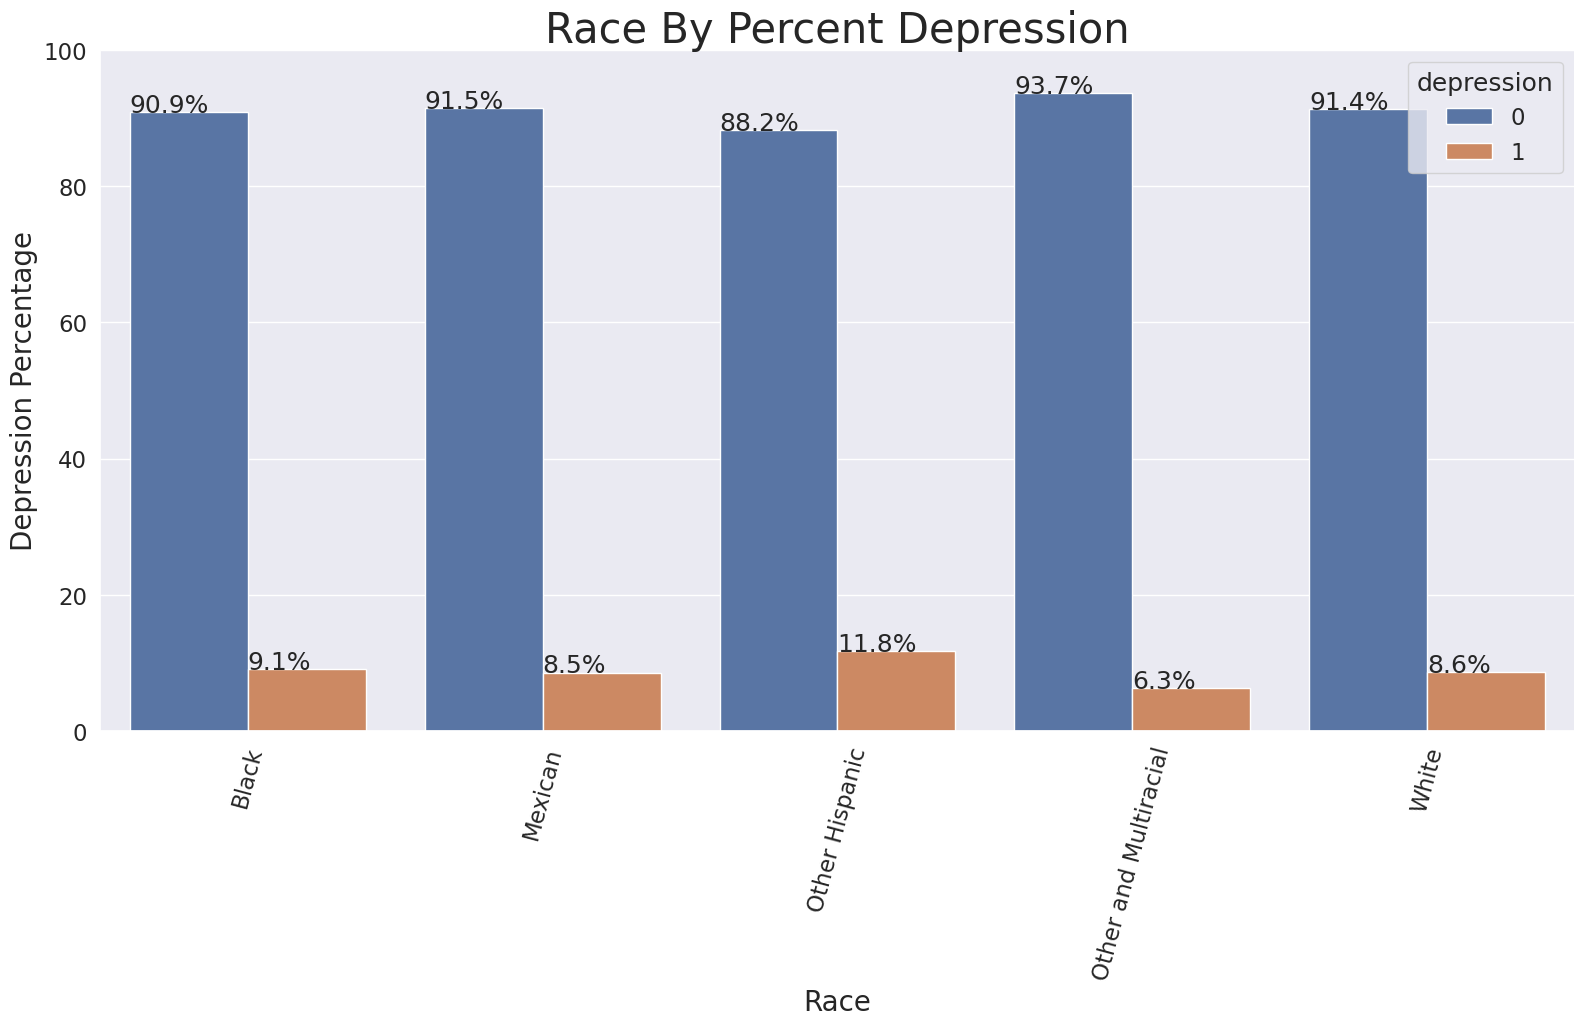

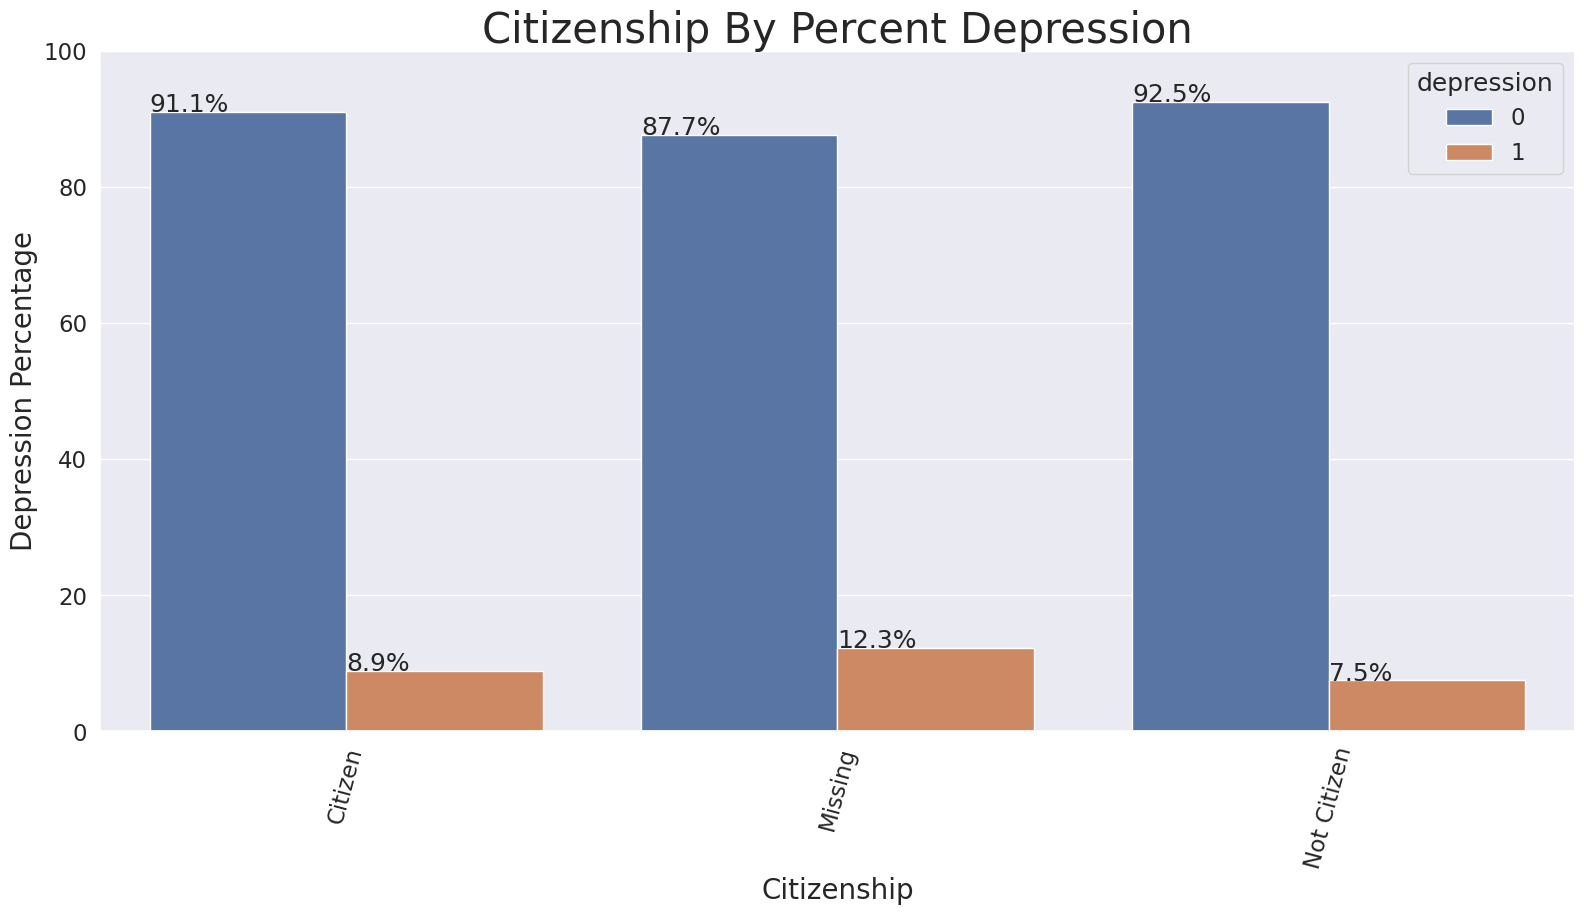

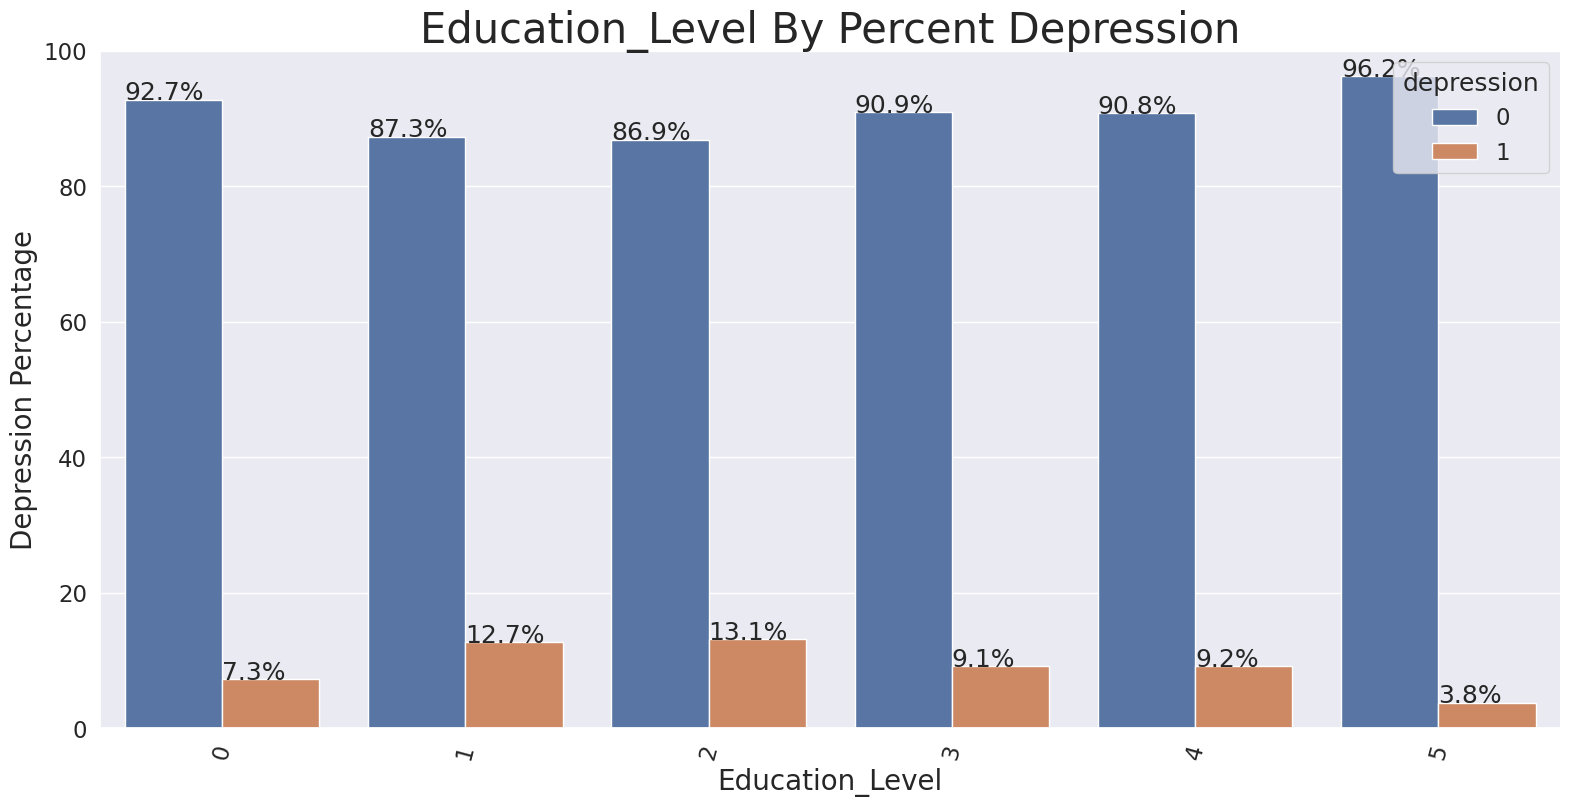

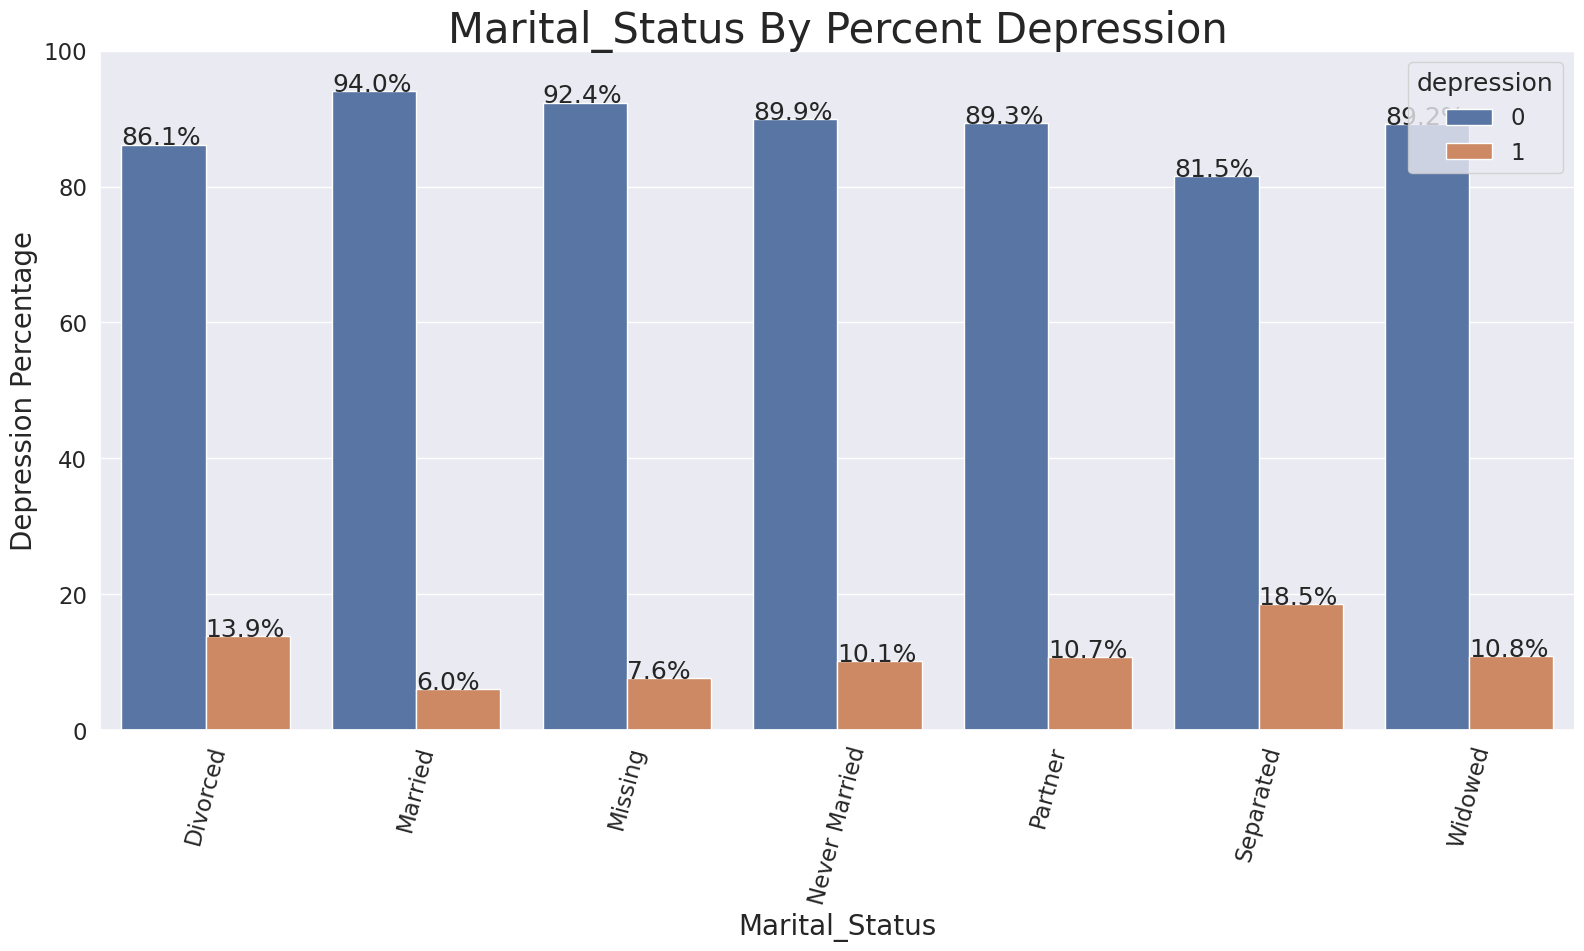

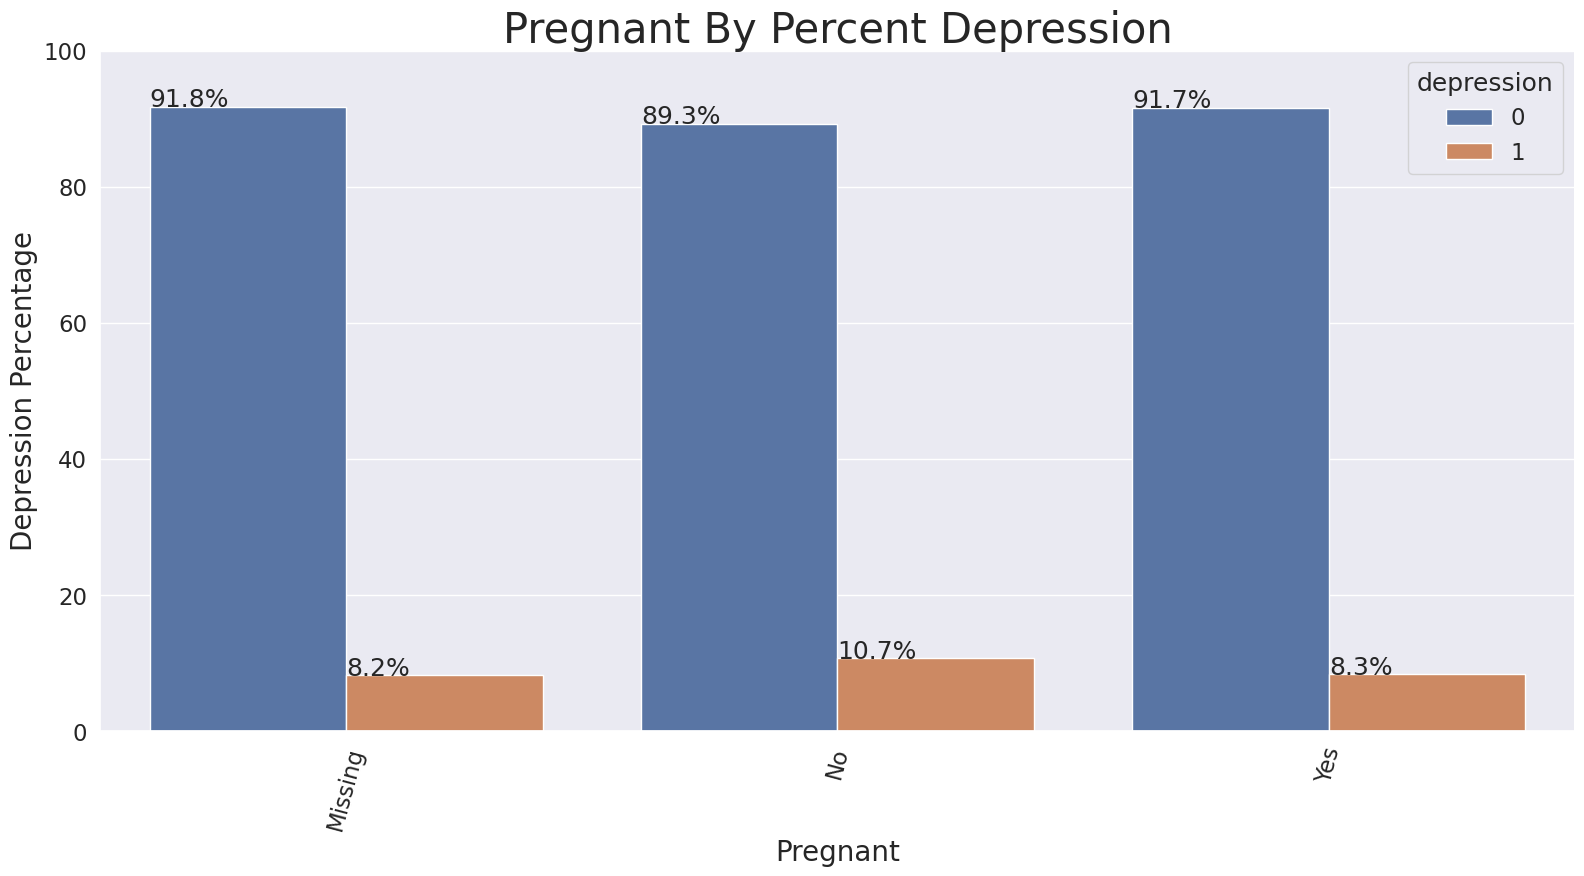

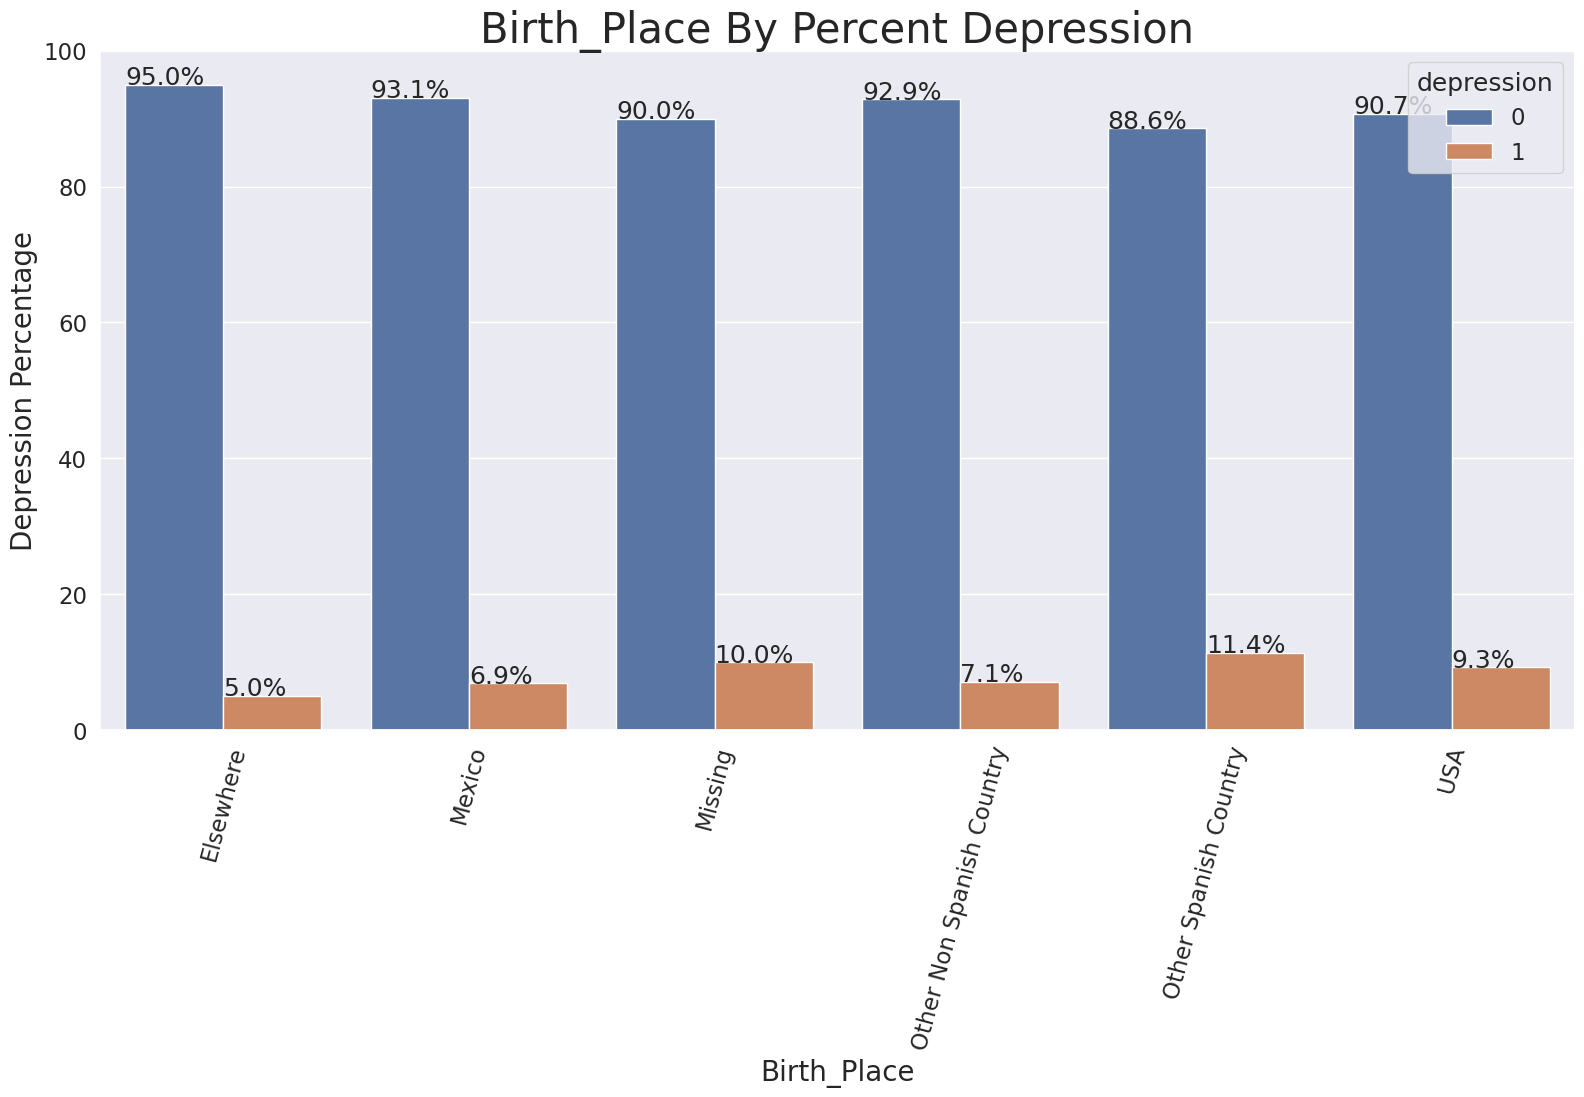

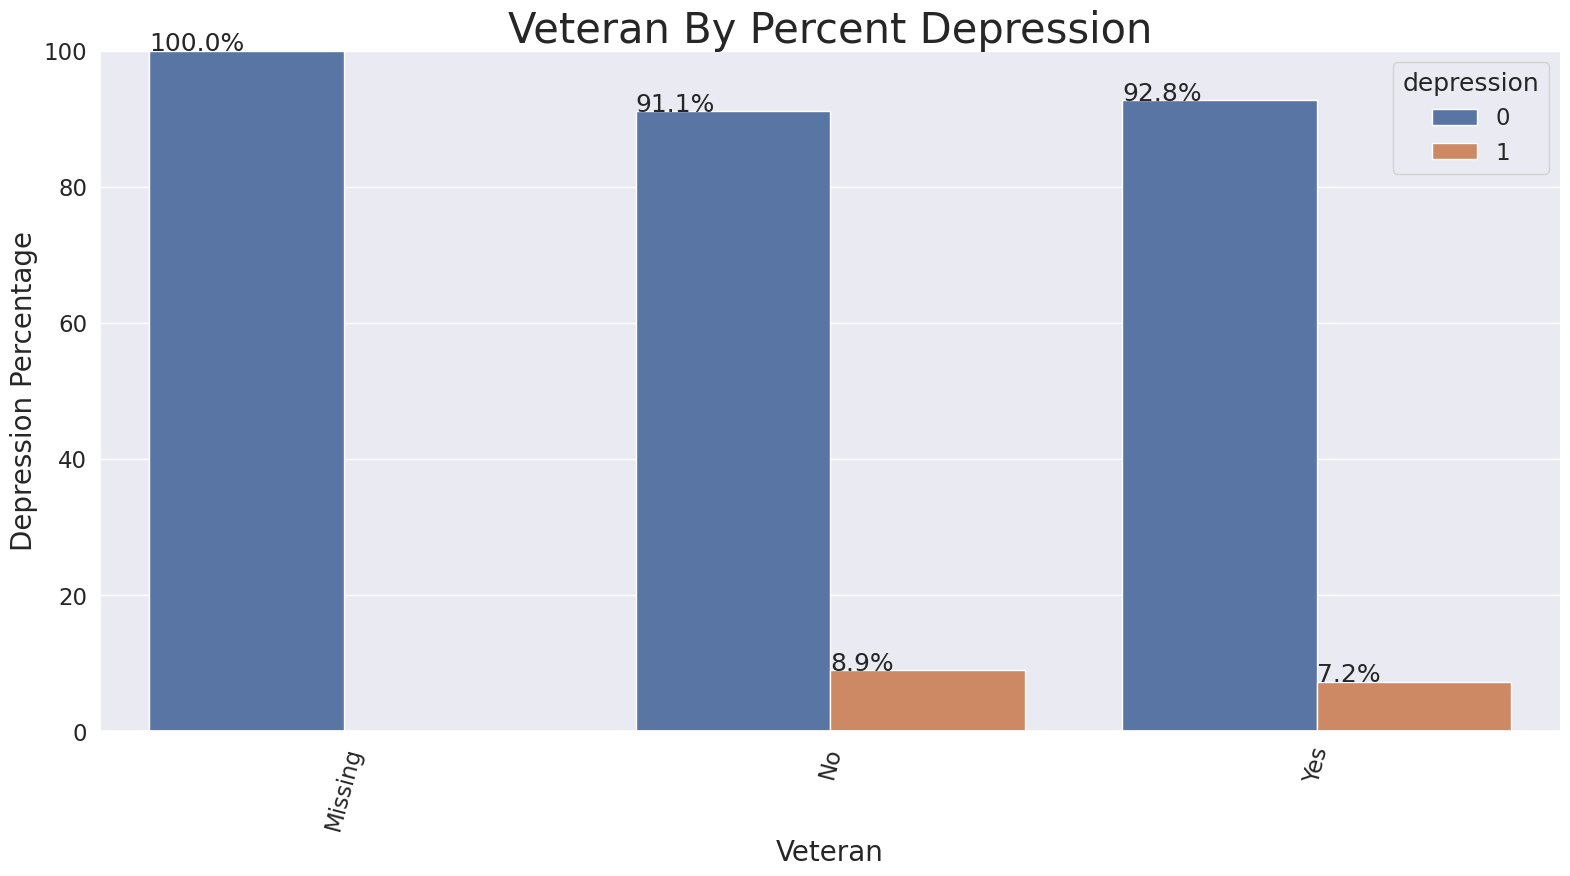

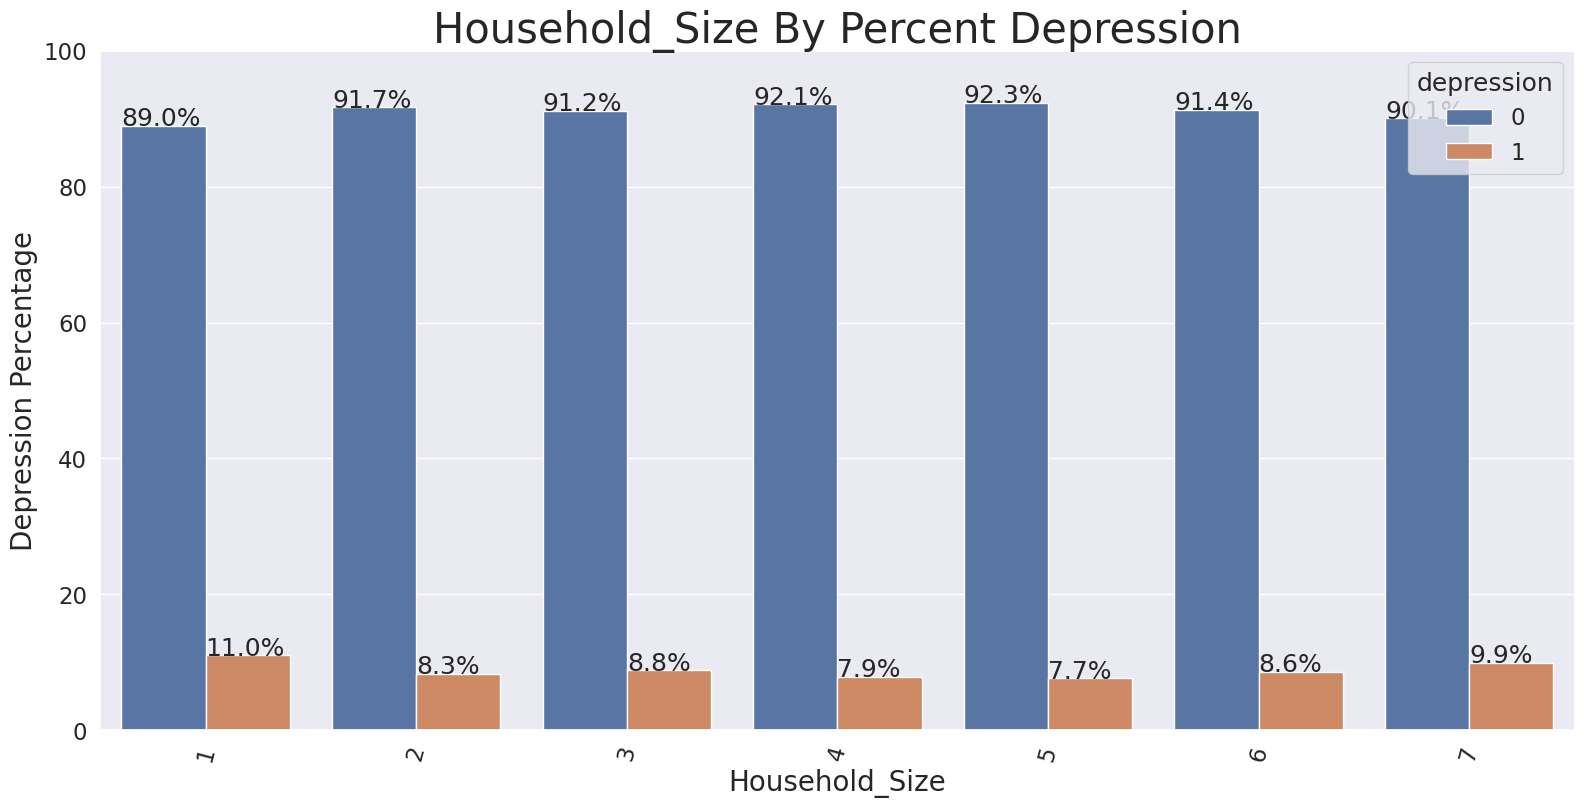

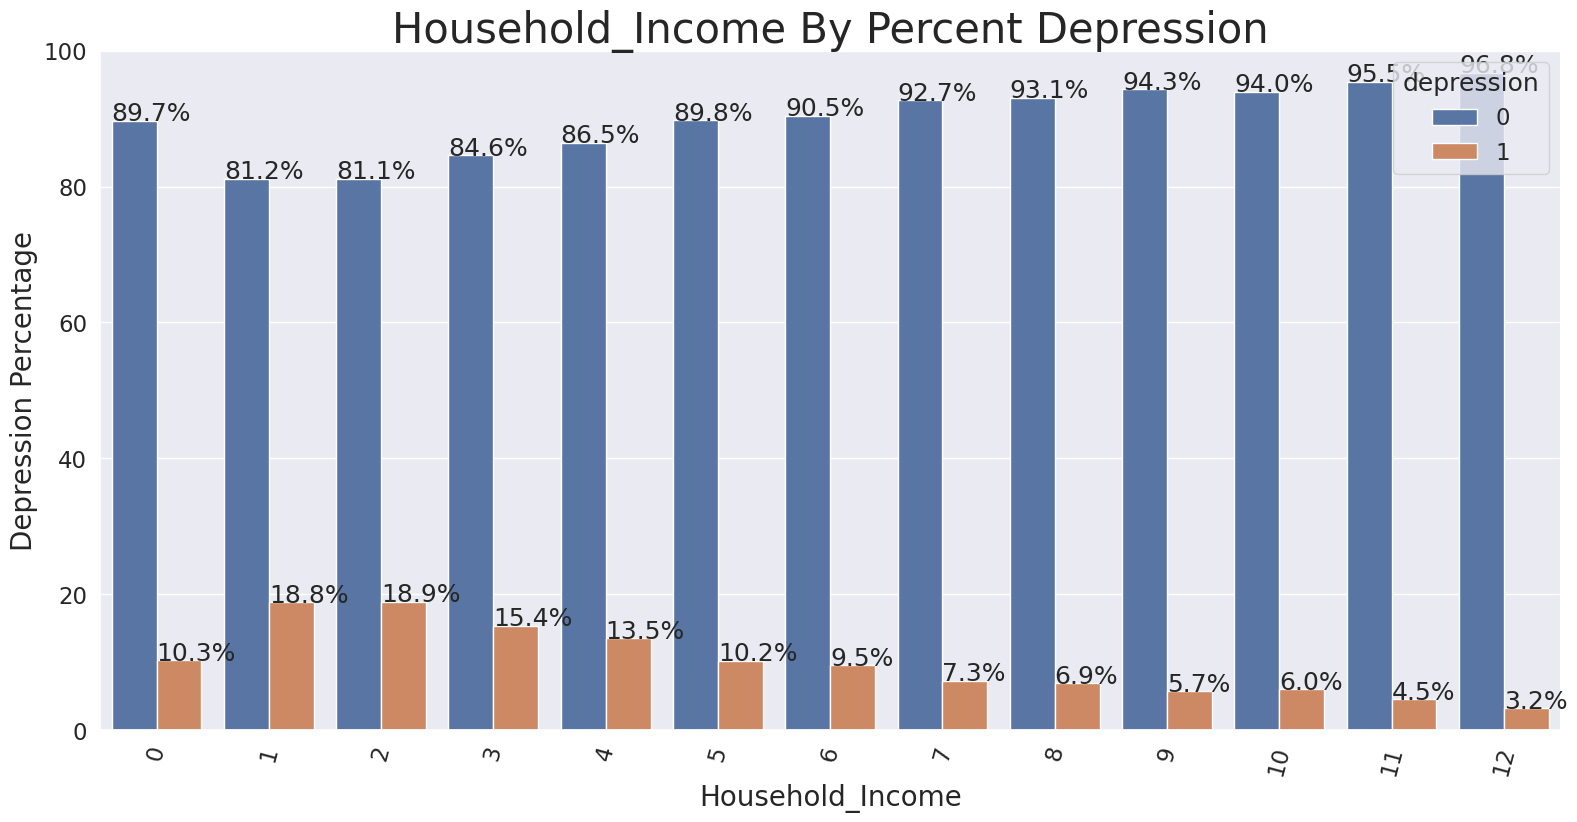

In [ ]:
# plotting the columns
for col in demo_cat_cols:
    plotting_percentages(train_df,col)

There are a higher percentage of females than males who have depression.

Those who have less education have higher percentages of depression than those who have more.

Those who are divorced or separated have higher percentages of depression and those who are married had the lowest percent depression of all the marital statuses.

The percentage of those who are depressed shrinks as the household income level increases.

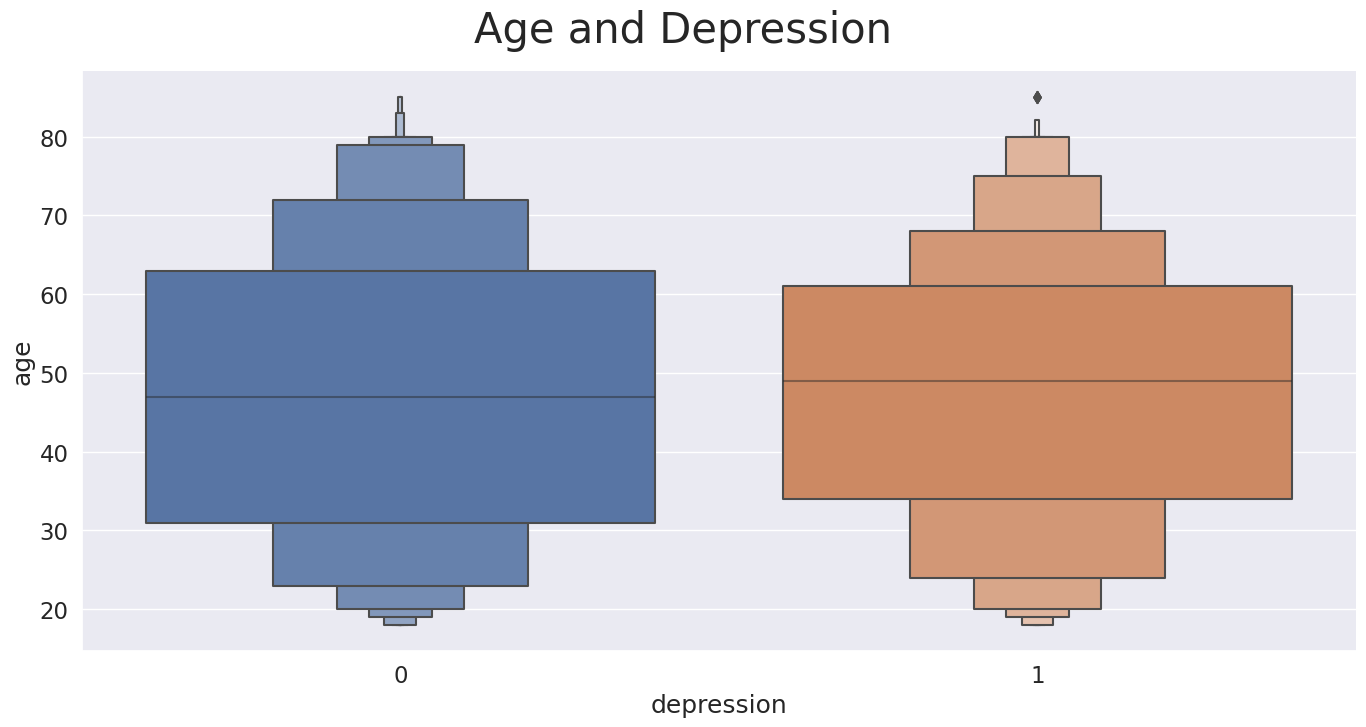

In [ ]:
# plotting the columns
for col in demo_num_cols:
    plot_num_cols(train_df,col)

The age of those who are depressed are more concentrated in the middle ages.

**Occupation**


---



In [ ]:
# listing the columns
occupation_cat_cols=['full_time_work','work_type','out_of_work']

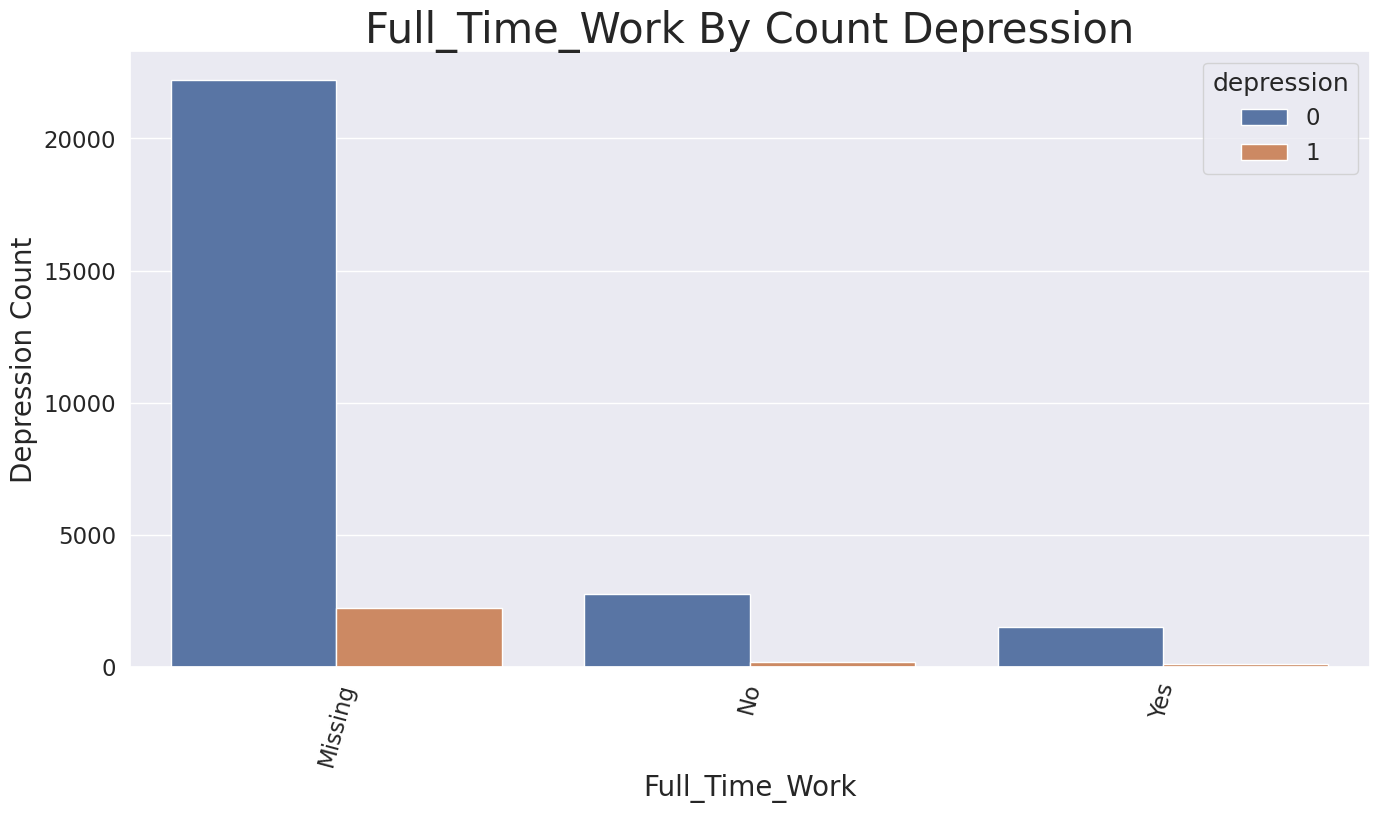

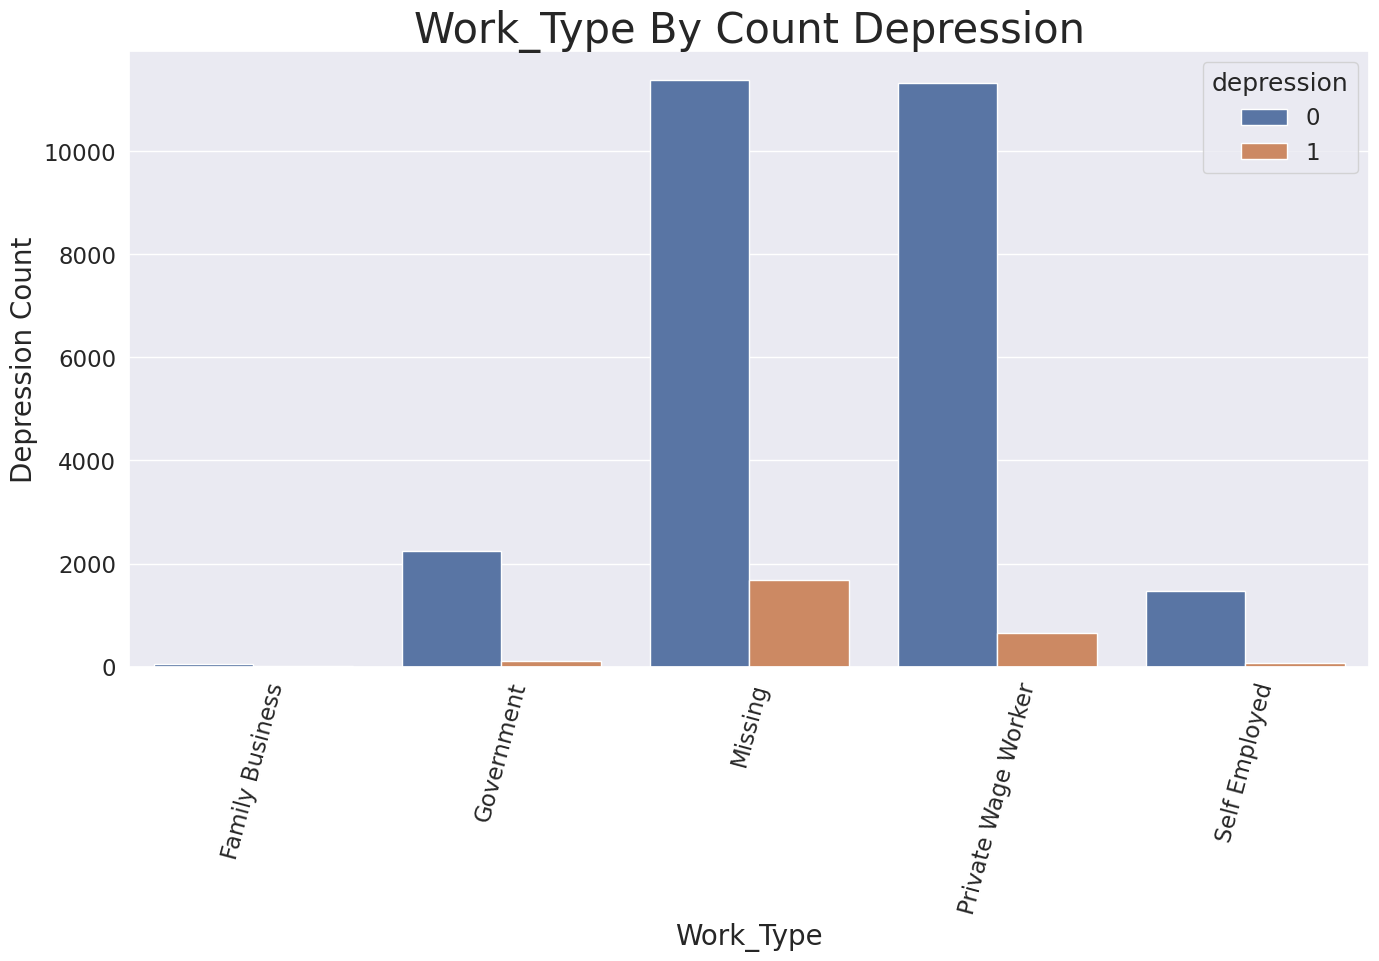

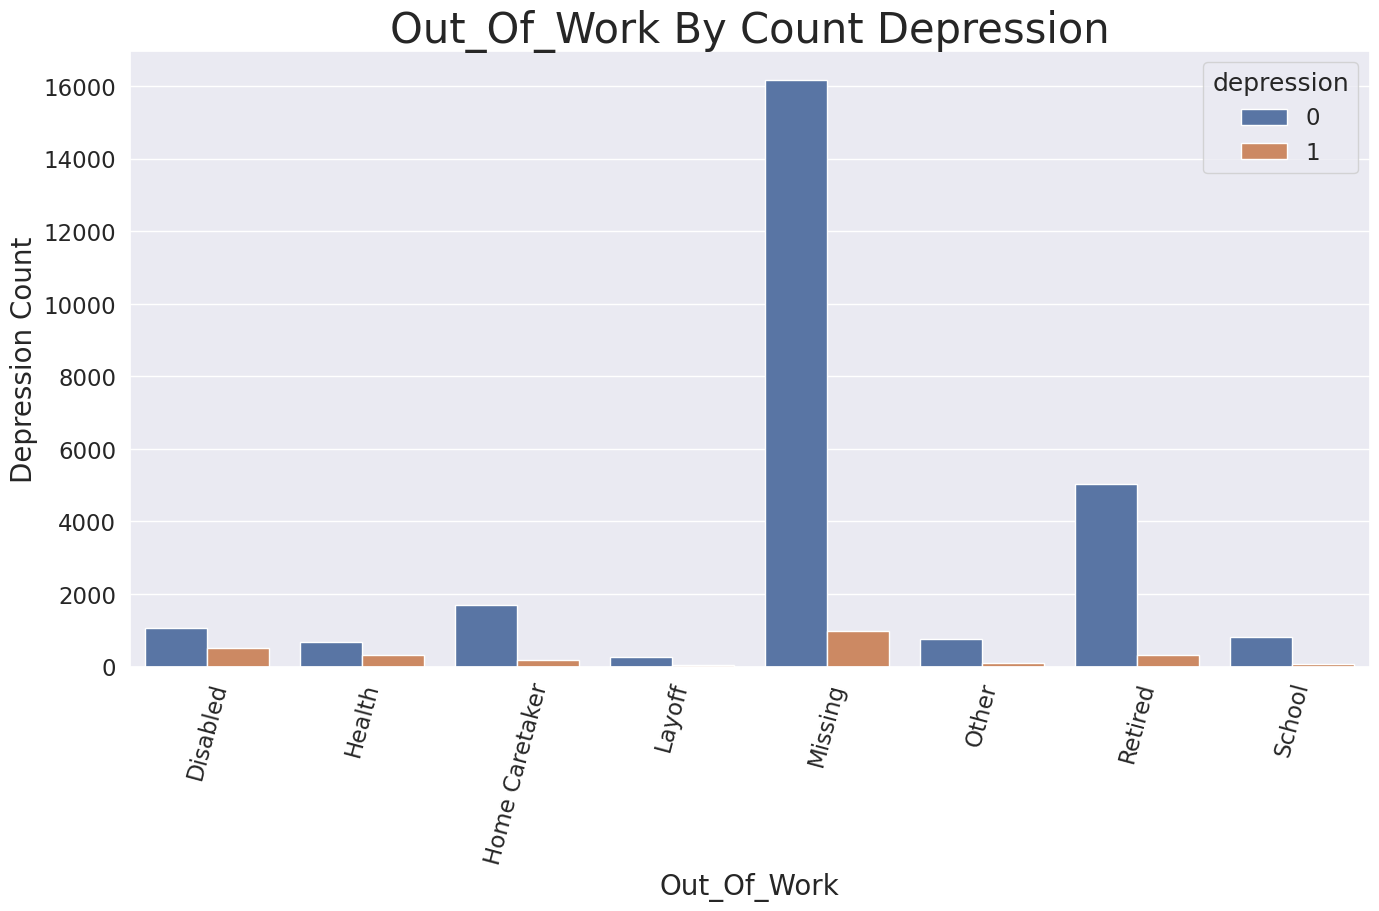

In [ ]:
# plotting the columns
for col in occupation_cat_cols:
    plotting_counts(train_df,col)

Those who are out of work for health reasons or disabled have a higher percentage of depression.

Those who have been laid off have a higher percentage of depression than other groups.

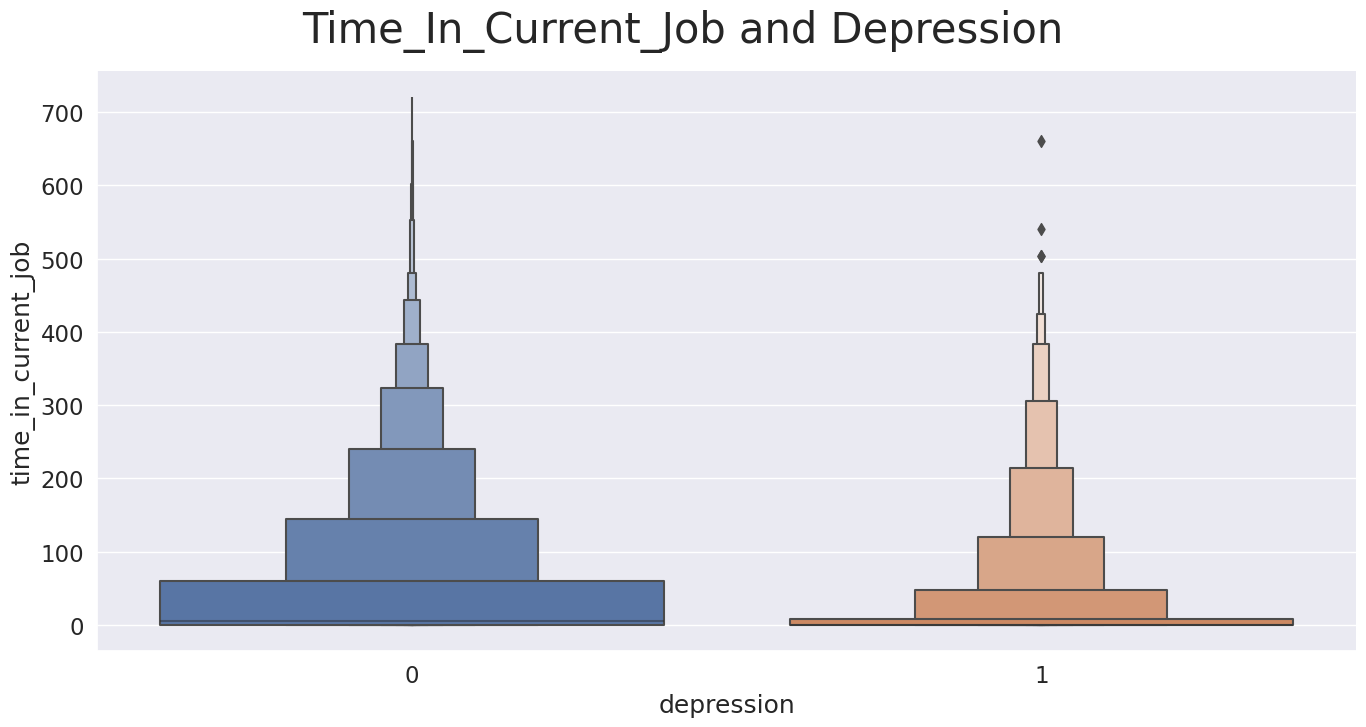

In [ ]:
# plotting the column
plot_num_cols(train_df,'time_in_current_job')

Those who are not depressed have been at their current job for longer on average than those who are depressed.

**Sleep Disorders**


---



(<Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'Trouble_Sleeping_History By Count Depression'}, xlabel='Trouble_Sleeping_History', ylabel='Depression Count'>)

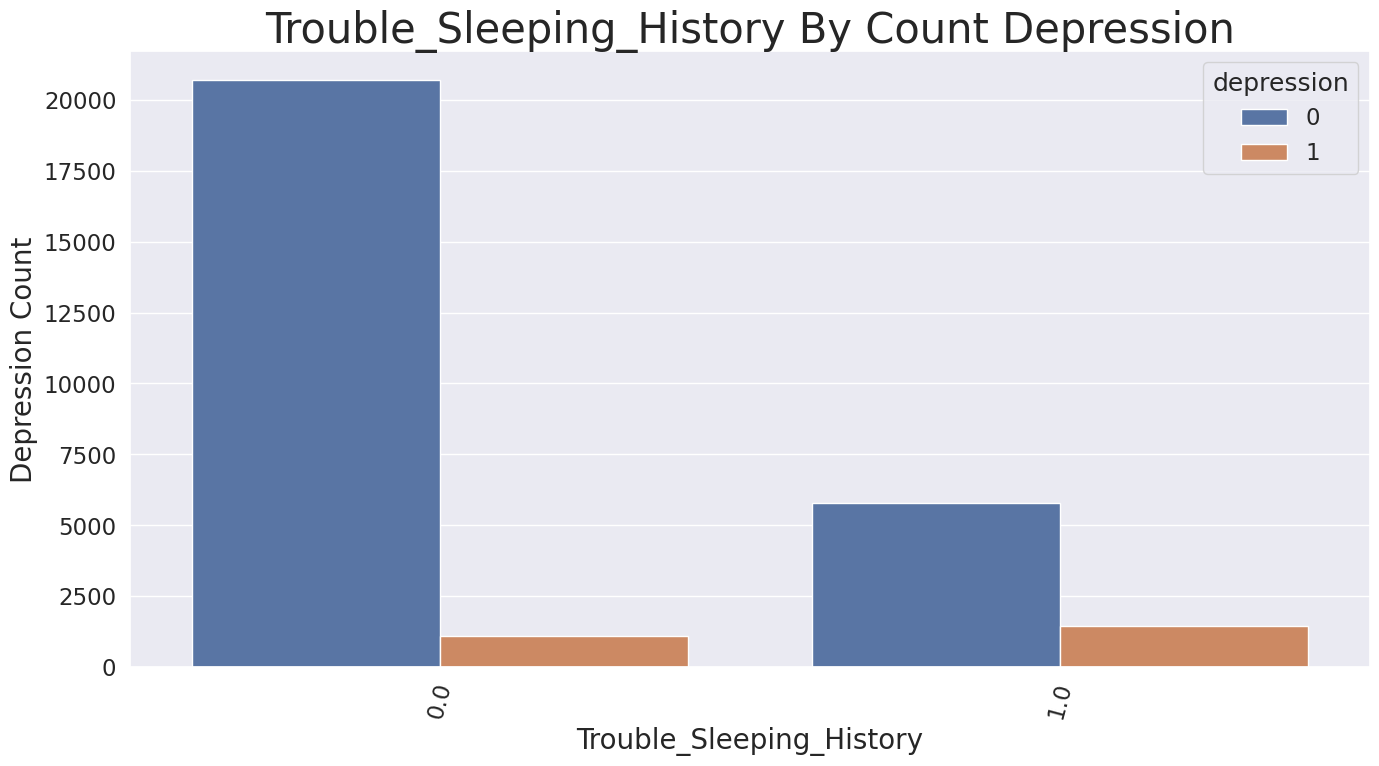

In [ ]:
# plotting the column
plotting_counts(train_df,'trouble_sleeping_history')

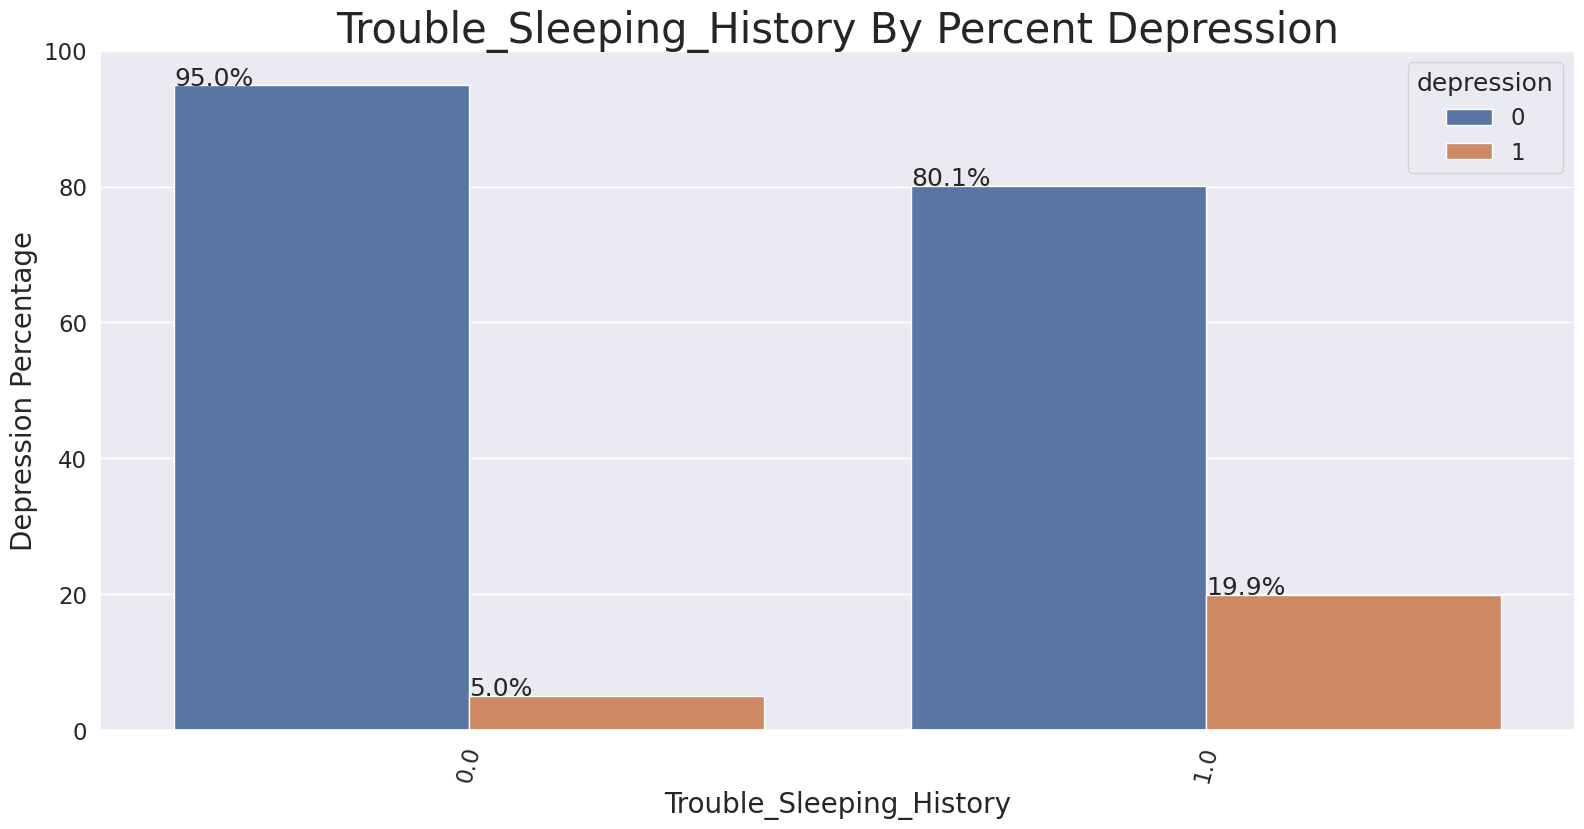

In [ ]:
# plotting the column
plotting_percentages(train_df,'trouble_sleeping_history')

Those who have trouble sleeping have 4 times the percentage of depression than those who don't.

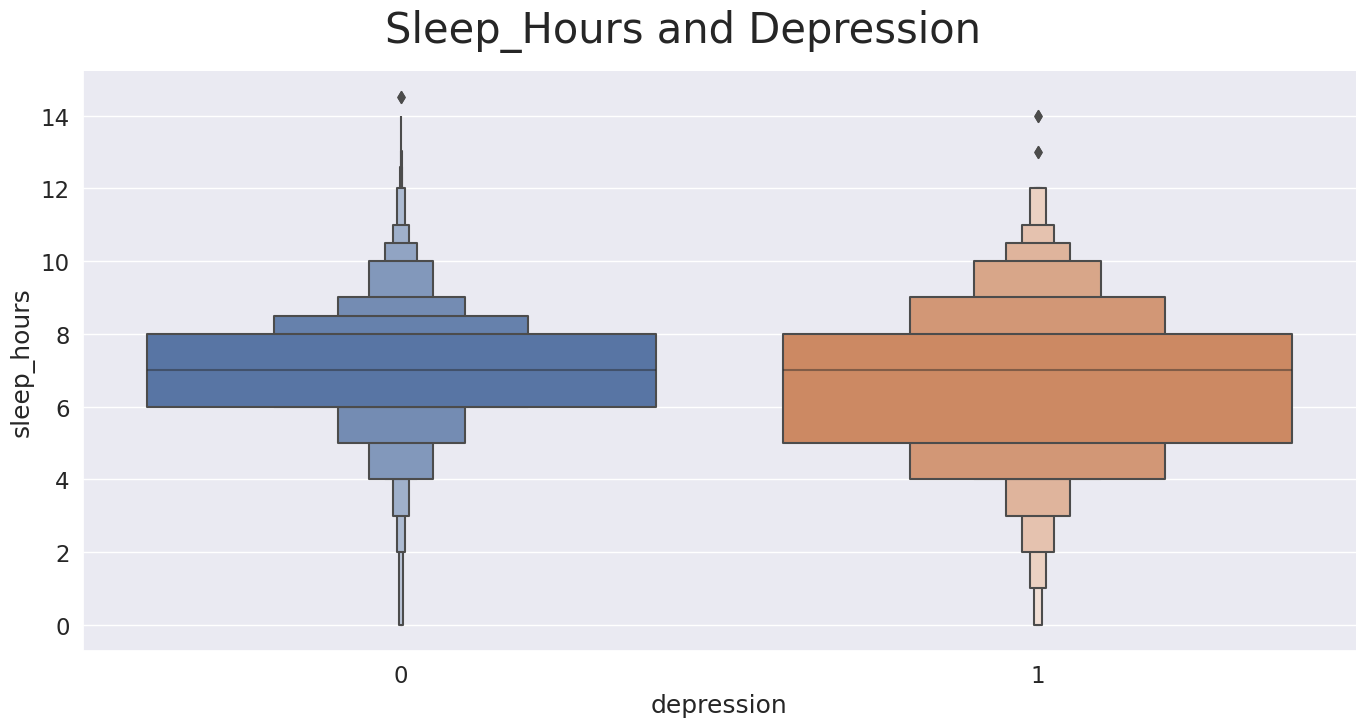

In [ ]:
# plotting the column
plot_num_cols(train_df,'sleep_hours')

The sleep hours for the depressed group is concentrated in a range that includes less sleep than the not depressed group.

**Alcohol Use**


---



In [ ]:
# listing the columns
alcohol_num_cols=['drinks_per_occasion','drinks_past_year']

(<Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'Lifetime_Alcohol_Consumption By Count Depression'}, xlabel='Lifetime_Alcohol_Consumption', ylabel='Depression Count'>)

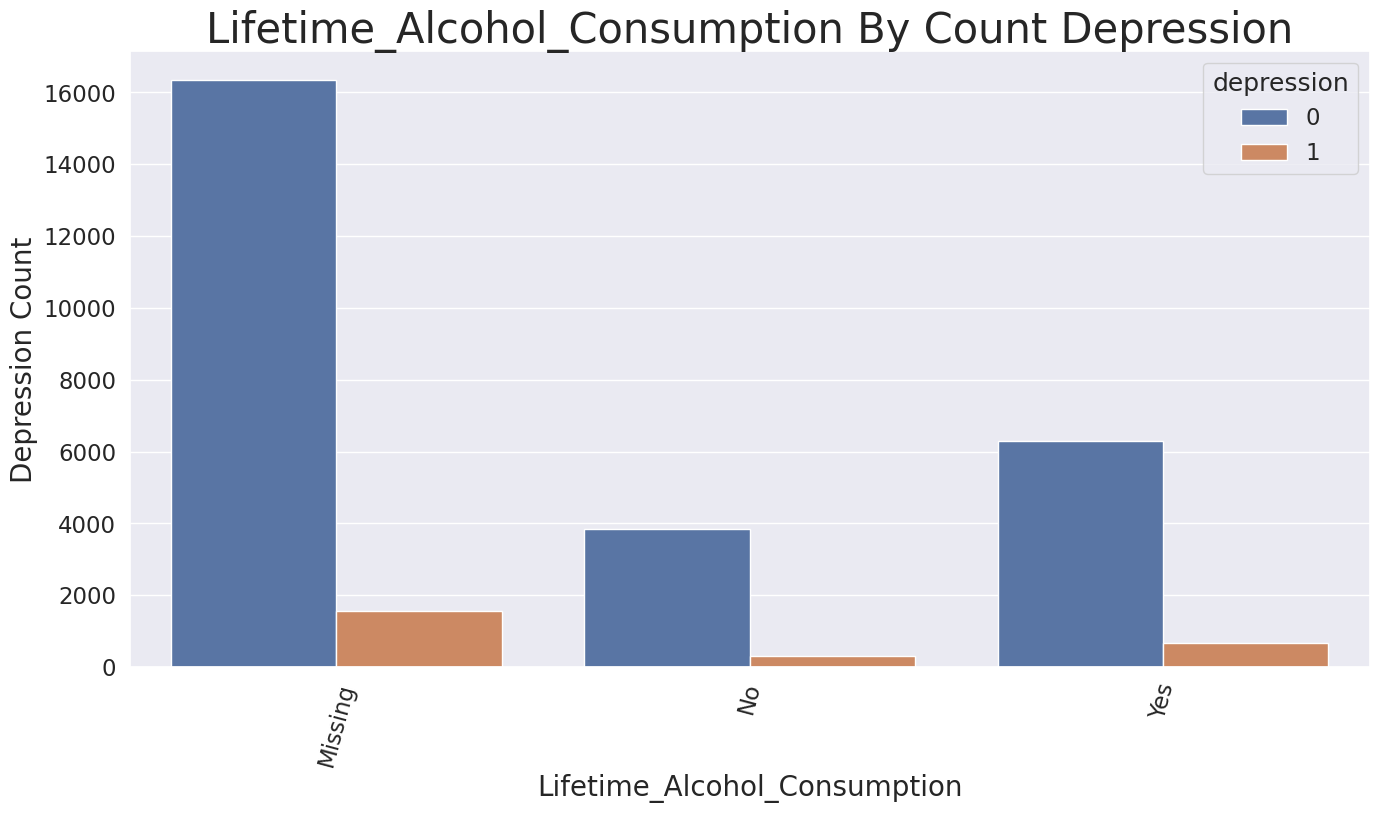

In [ ]:
# plotting the column
plotting_counts(train_df,'lifetime_alcohol_consumption')

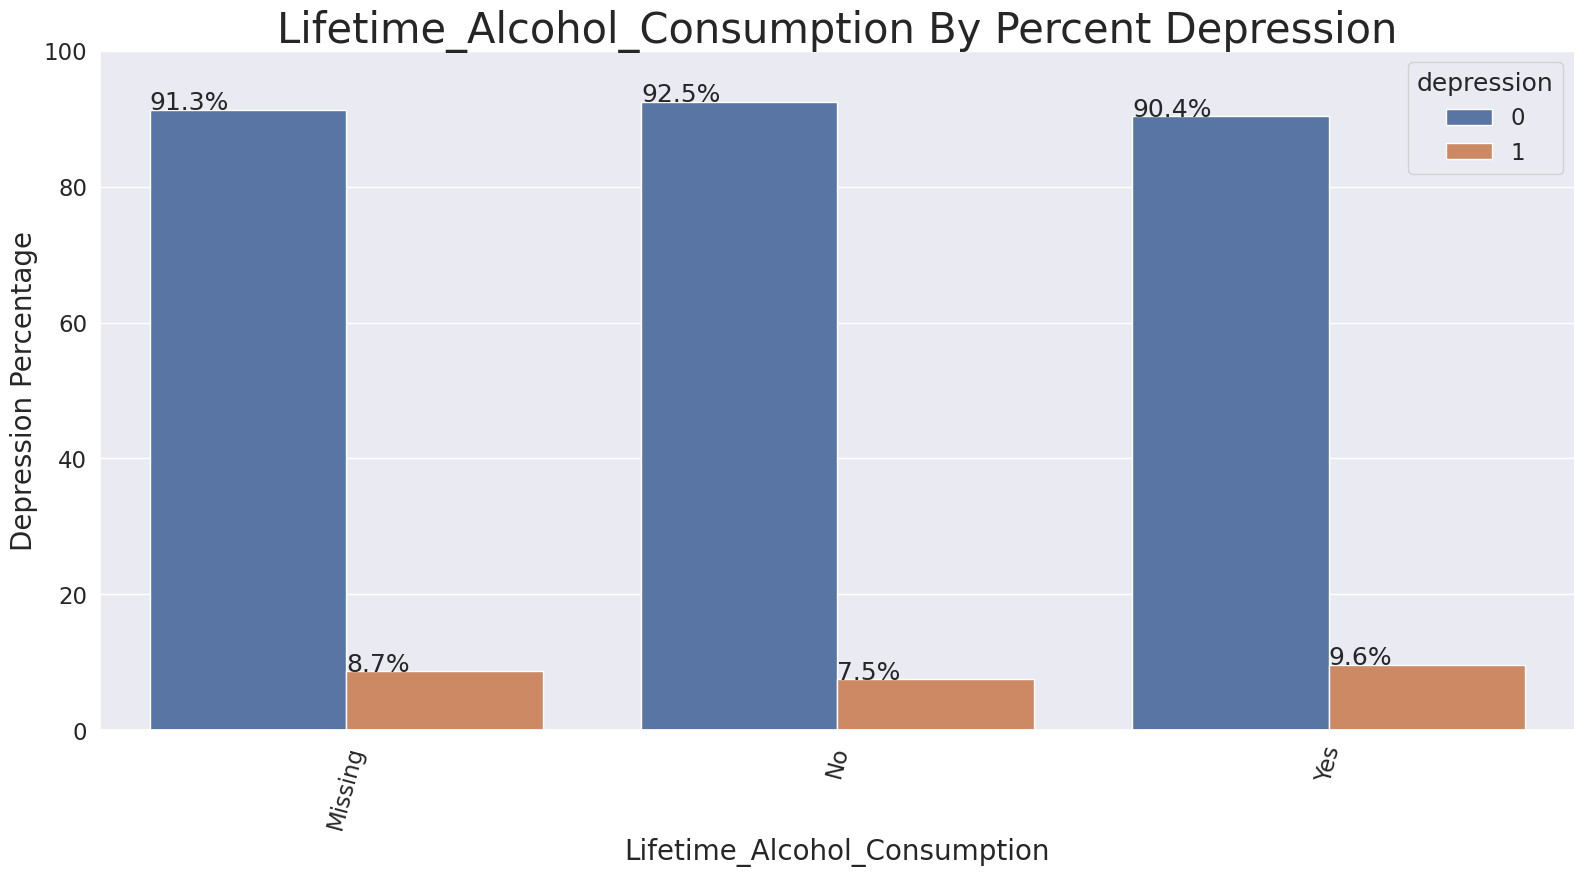

In [ ]:
# plotting the column
plotting_percentages(train_df,'lifetime_alcohol_consumption')

Those who have never had alcohol in their life have a slightly lower percent depression than those who have had alcohol.

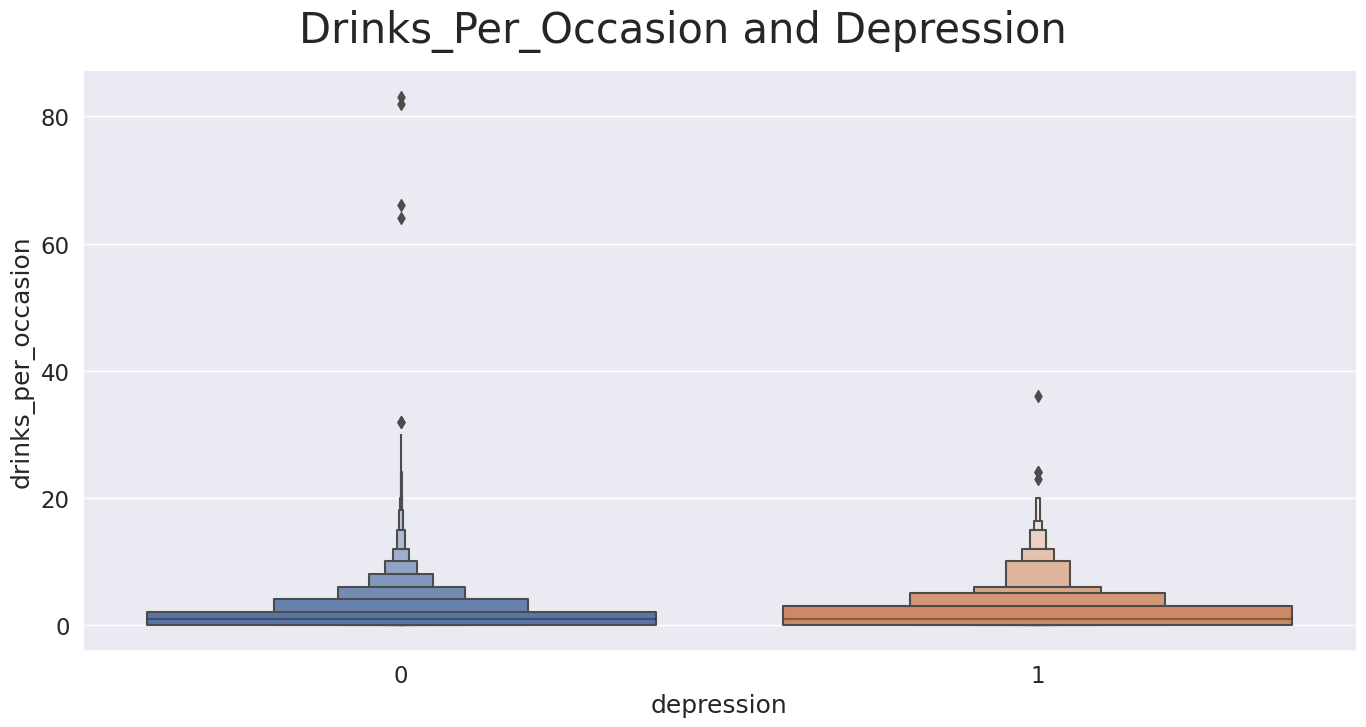

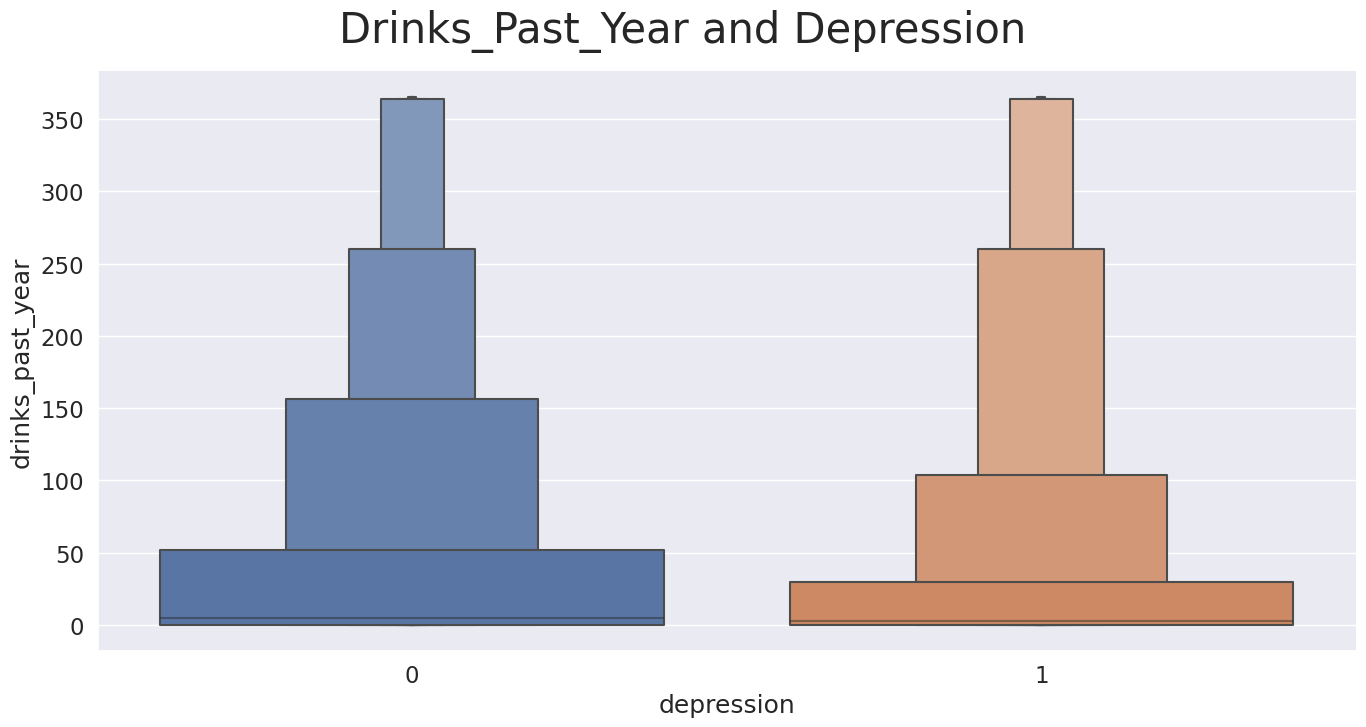

In [ ]:
# plotting the columns
for col in alcohol_num_cols:
    plot_num_cols(train_df,col)

Those who do not have depression have had more alcoholic drinks in the past year than those who do have depression.

**Modeling Preparation**


---



**One Hot Encode**

In [ ]:
# creating an encoder object
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
# selecting the columns to be one hot encoded
ohe_cols=X_train.select_dtypes('O').columns

In [ ]:
# one hot encoding the columns
ohe_train=encoder.fit_transform(X_train[ohe_cols])
ohe_test=encoder.transform(X_test[ohe_cols])

In [ ]:
# getting the new names of the columns
col_names=encoder.get_feature_names_out(ohe_cols)

In [ ]:
# turning the encoded columns into dataframes
ohe_train_df=pd.DataFrame(ohe_train,columns=col_names,index=X_train.index)
ohe_test_df=pd.DataFrame(ohe_test,columns=col_names,index=X_test.index)

**Scaling**

In [ ]:
# listing the columns
scale_cols=X_train.select_dtypes('number').columns

In [ ]:
# initiating the transformer
from sklearn.preprocessing import QuantileTransformer
transformer=QuantileTransformer(random_state=123)

In [ ]:
# fitting the transformer
trans_train=transformer.fit_transform(X_train[scale_cols])
trans_test=transformer.transform(X_test[scale_cols])

In [ ]:
# turning the scaled data into dataframes
trans_train_df=pd.DataFrame(trans_train,columns=X_train[scale_cols].columns,index=X_train.index)
trans_test_df=pd.DataFrame(trans_test,columns=X_train[scale_cols].columns,index=X_test.index)

In [ ]:
# combining the one hot encoded and scaled data
X_train_tf=pd.concat([ohe_train_df,trans_train_df],axis=1)
X_test_tf=pd.concat([ohe_test_df,trans_test_df],axis=1)

**KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
# initiating a range of clusters to try
k_range=range(2,16)
cal_har_score=[]
inertia=[]
sil_score=[]
# fitting a KMeans model to the data with a cluster size for each number
for k in k_range:
    model=KMeans(n_clusters=k,random_state=123)
    model.fit(X_train_tf)
    # creating predictions and calculating scores
    preds=pd.Series(model.predict(X_train_tf))
    cal_har_score.append(metrics.calinski_harabasz_score(X_train_tf,preds))
    sil_score.append(metrics.silhouette_score(X_train_tf,preds,random_state=123))
    inertia.append(model.inertia_)

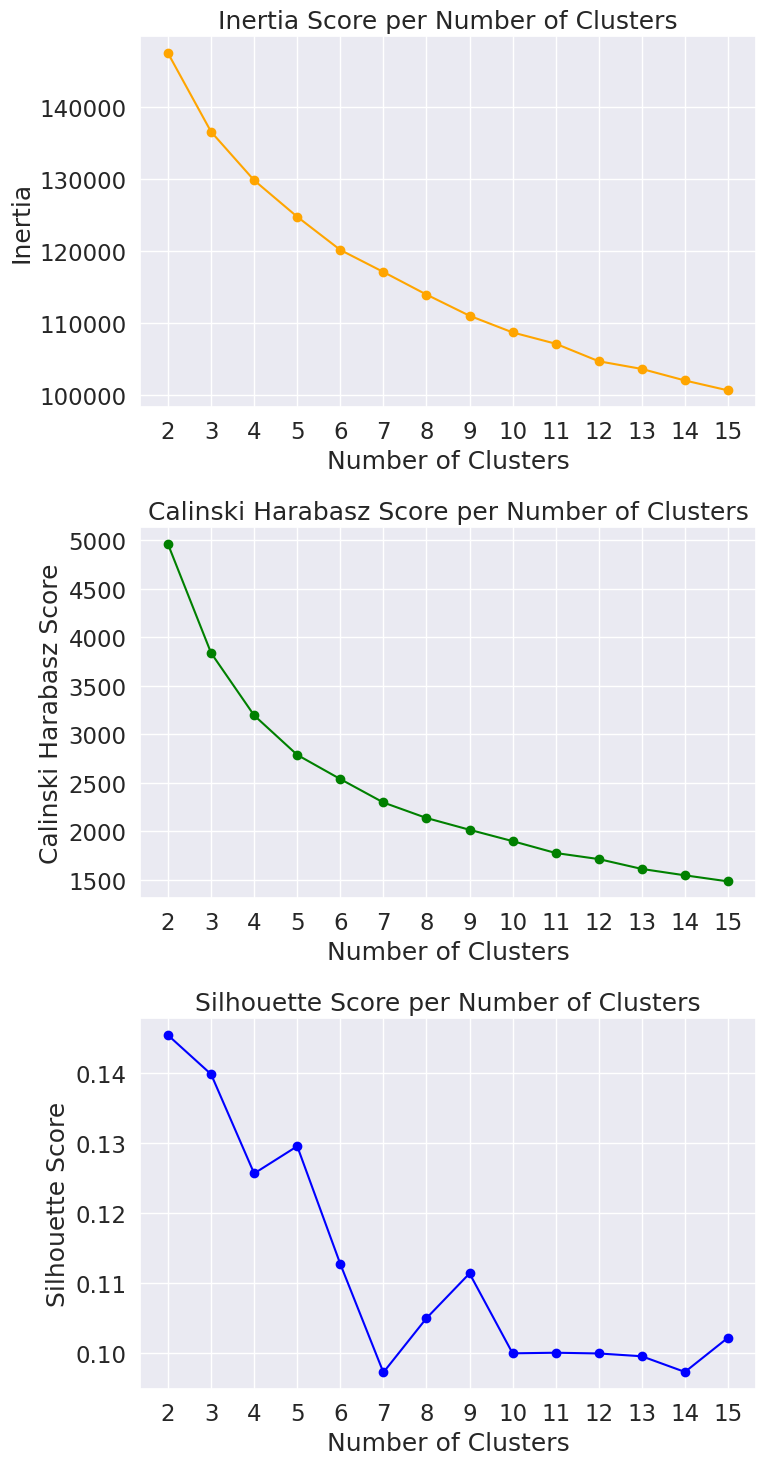

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(8,15),nrows=3)
ax1.plot(k_range,inertia,'-o',color='orange')
ax1.set(xlabel='Number of Clusters',ylabel='Inertia')
ax1.set_xticks(k_range)
ax1.set_title('Inertia Score per Number of Clusters')
ax2.plot(k_range,cal_har_score,'-o',color='green')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Calinski Harabasz Score')
ax2.set_xticks(k_range)
ax2.set_title('Calinski Harabasz Score per Number of Clusters')
ax3.plot(k_range,sil_score,'-o',color='blue')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Silhouette Score per Number of Clusters')
ax3.set_xticks(k_range)
fig.tight_layout()

Five is an appropriate cluster number as there is a bump in the Silhouette score there. The the other scores don't help  much.

In [ ]:
# fitting five clusters onto the training data
k_clusters=5
k_model=KMeans(k_clusters,random_state=123)
k_model.fit(X_train_tf)
# creating predictions for the training data
kmeans_train_preds=k_model.predict(X_train_tf)
kmeans_train=pd.Series(kmeans_train_preds,index=X_train_tf.index,name='Cluster')
# creating predictions for the test data
kmeans_test_preds=k_model.predict(X_test_tf)
kmeans_test=pd.Series(kmeans_test_preds,index=X_test_tf.index,name='Cluster')

In [ ]:
# combining the clusters with the rest of the data
X_train_final=pd.concat([X_train_tf,kmeans_train],axis=1)
X_test_final=pd.concat([X_test_tf,kmeans_test],axis=1)

**Model Evaluation**


---



In [ ]:
def make_classification_report(model,y_true,x_test,title=''):
    y_preds=model.predict(x_test)
    print('__________________________________________________________________')
    print(f'CLASSIFICATION REPORT FOR: \n\t{title}')
    print('__________________________________________________________________')
    print('\n')
    report=metrics.classification_report(y_true,y_preds,target_names=['not depressed','depressed'])
    report_dict=metrics.classification_report(y_true,y_preds,output_dict=True,target_names=['not depressed','depressed'])
    report_dict['title']=title
    print(report)
    print('__________________________________________________________________')
    return report_dict

In [ ]:
def plot_confusion_matrix(model,X,y,title=''):
    fig=metrics.ConfusionMatrixDisplay.from_estimator(model,X,y,normalize='true',cmap='Greens',
                                                      display_labels=['not depressed','depressed'])
    plt.grid(False)
    plt.title(f'Confusion Matrix for {title}',fontdict={'fontsize':17})
    plt.show()
    print('__________________________________________________________________')
    return fig

In [ ]:
def plot_roc_curve(model,xtest,ytest,title=''):
    fig,ax=plt.subplots(figsize=(8,6),ncols=1)
    roc_plot=metrics.RocCurveDisplay.from_estimator(model,xtest,ytest,ax=ax)
    ax.set_title(f'ROC Curve for {title}',fontdict={'fontsize':17})
    ax.legend()
    plt.show();
    return fig

In [ ]:
def plot_top_features(model,xtrain,title=''):
    importances=pd.Series(model.feature_importances_,index=xtrain.columns)
    importances.nlargest(10).sort_values().plot(kind='barh')
    plt.title(f'Most Important Features for {title}',fontdict={'fontsize':17})
    plt.xlabel('Importance')
    return importances.sort_values(ascending=False)

In [ ]:
def evaluate_model(model,xtrain,xtest,ytest,tree=False,title=''):
    make_classification_report(model,ytest,xtest,title=title)
    plot_confusion_matrix(model,xtest,ytest,title=title)
    plot_roc_curve(model,xtest,ytest,title=title)
    if tree:
        plot_top_features(model,xtrain,title=title)

In [ ]:
# making a scorer
from sklearn.metrics import fbeta_score,make_scorer
f2_scorer=make_scorer(fbeta_score,beta=2)

**Dummy Model**


---



In [ ]:
# fitting a dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy='stratified',random_state=123)
dummy_clf.fit(X_train_final,y_train)

DummyClassifier(random_state=123, strategy='stratified')

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Dummy Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.91      0.92      0.92      6618
    depressed       0.10      0.09      0.10       634

     accuracy                           0.84      7252
    macro avg       0.51      0.51      0.51      7252
 weighted avg       0.84      0.84      0.84      7252

__________________________________________________________________


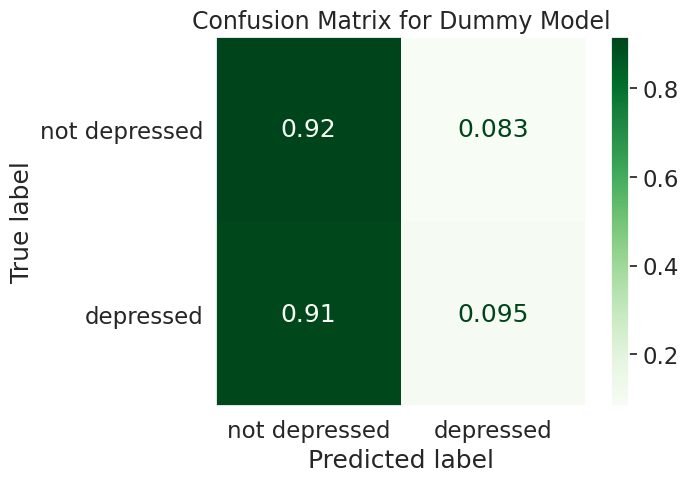

__________________________________________________________________


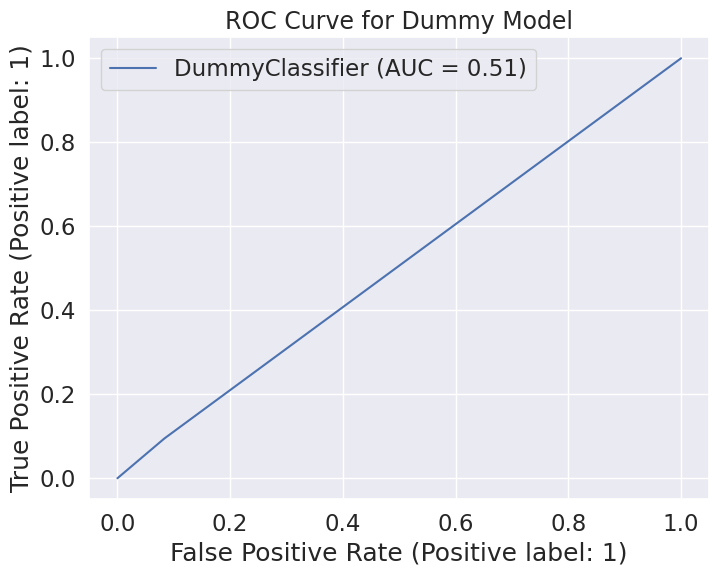

In [ ]:
# evaluating the model
evaluate_model(dummy_clf,X_train_final,X_test_final,y_test,title='Dummy Model')

The accuracy for the dummy model is 84% which is why accuracy can not be relied upon for this task.

**Logistic Regression**


---



**Base Model**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# creating the classifier
logreg_clf=LogisticRegressionCV(class_weight='balanced',random_state=123,scoring=f2_scorer,n_jobs=-1,cv=5)
# fitting to the training data
logreg_base=logreg_clf.fit(X_train_final,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Logistic Regression Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.75      0.84      6618
    depressed       0.20      0.67      0.31       634

     accuracy                           0.74      7252
    macro avg       0.58      0.71      0.58      7252
 weighted avg       0.89      0.74      0.79      7252

__________________________________________________________________


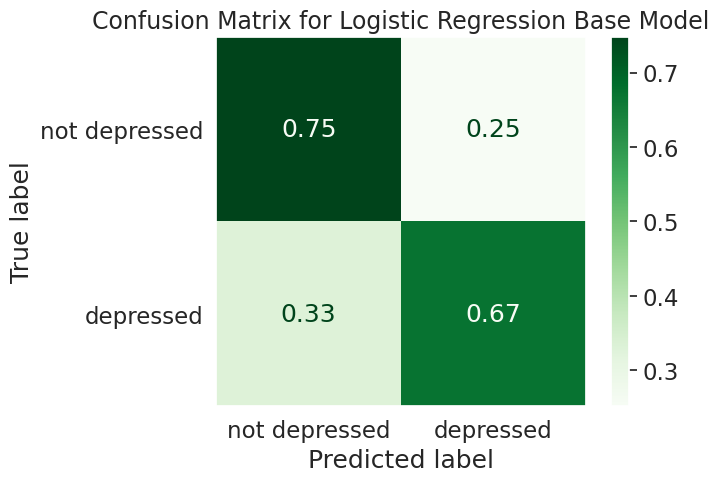

__________________________________________________________________


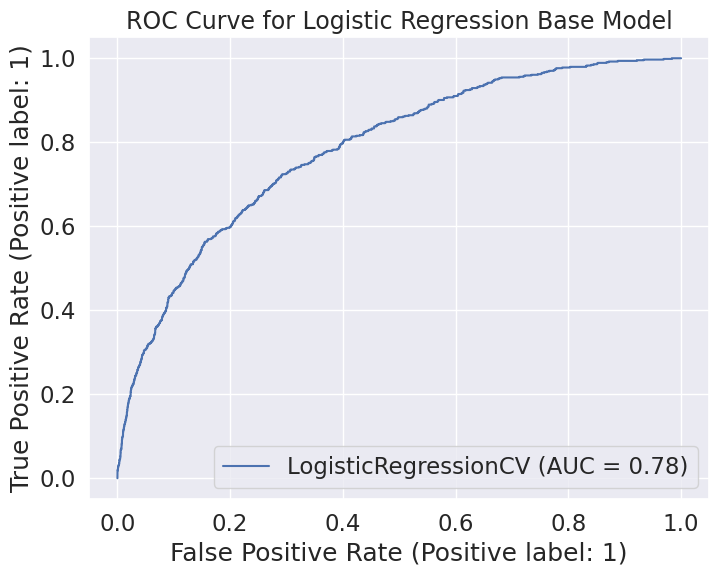

In [ ]:
# evaluating the model
evaluate_model(logreg_base,X_train_final,X_test_final,y_test,title='Logistic Regression Base Model')

**ElasticNet Model**

In [ ]:
# creating the classifier
logreg_clf=LogisticRegressionCV(class_weight='balanced',solver='saga',penalty='elasticnet',l1_ratios=[.1,.3,.5,.7,.9],
                                random_state=123,scoring=f2_scorer,n_jobs=-1,cv=5)

# fitting to the training data
logreg_elastic=logreg_clf.fit(X_train_final,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Logistic Regression ElasticNet Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.75      0.84      6618
    depressed       0.21      0.68      0.32       634

     accuracy                           0.75      7252
    macro avg       0.58      0.72      0.58      7252
 weighted avg       0.89      0.75      0.80      7252

__________________________________________________________________


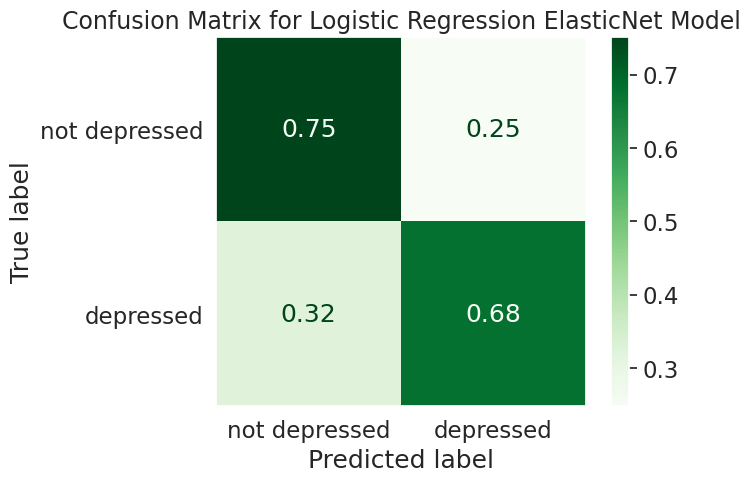

__________________________________________________________________


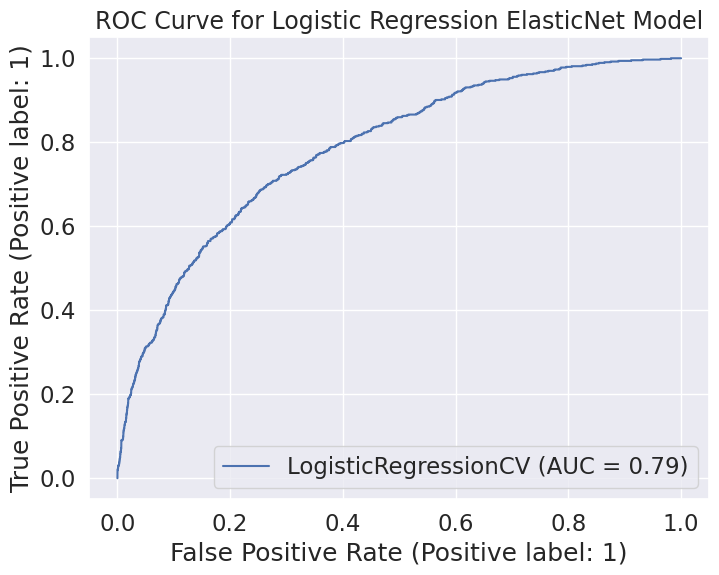

In [ ]:
# evaluating the model
evaluate_model(logreg_elastic,X_train_final,X_test_final,y_test,title='Logistic Regression ElasticNet Model')

**Grid Search**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating a list of C values
Cs_list=list(logreg_base.Cs_)

In [ ]:
# listing the parameters
logreg_params={'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'C':Cs_list}
# creating the classifier
logreg_clf=LogisticRegression(class_weight='balanced',random_state=123)
# feeding the parameters into the grid
grid=GridSearchCV(logreg_clf,logreg_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
logreg_grid=grid.fit(X_train_final,y_train)

In [ ]:
# creating a list of C values to drill down on the optimal value
C_drill_list=list(np.linspace(logreg_grid.best_params_['C']/5,logreg_grid.best_params_['C']*5,10))
C_drill_list.append(logreg_grid.best_params_['C'])

In [ ]:
# listing the parameters
logreg_params={'C':C_drill_list}
# creating the classifier
logreg_clf=LogisticRegression(solver='newton-cg',class_weight='balanced',random_state=123)
# feeding the parameters into the grid
grid=GridSearchCV(logreg_clf,logreg_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
logreg_grid2 = grid.fit(X_train_final, y_train)

In [ ]:
# the tuned model
logreg_gridmodel=logreg_grid2.best_estimator_

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Tuned Logistic Regression Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.75      0.84      6618
    depressed       0.20      0.67      0.31       634

     accuracy                           0.74      7252
    macro avg       0.58      0.71      0.58      7252
 weighted avg       0.89      0.74      0.79      7252

__________________________________________________________________


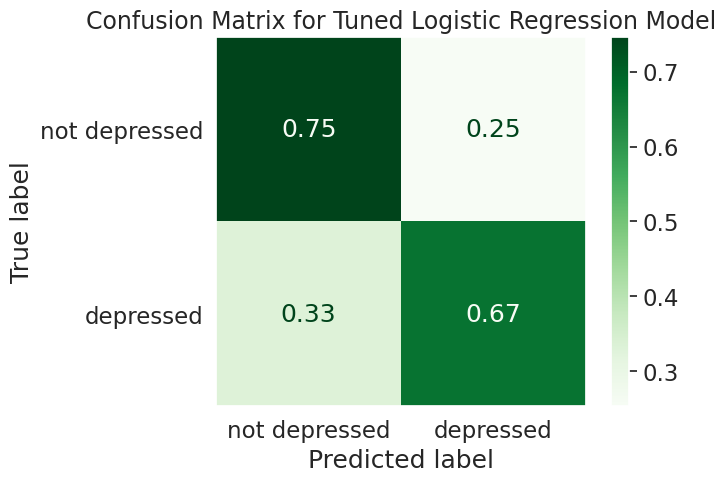

__________________________________________________________________


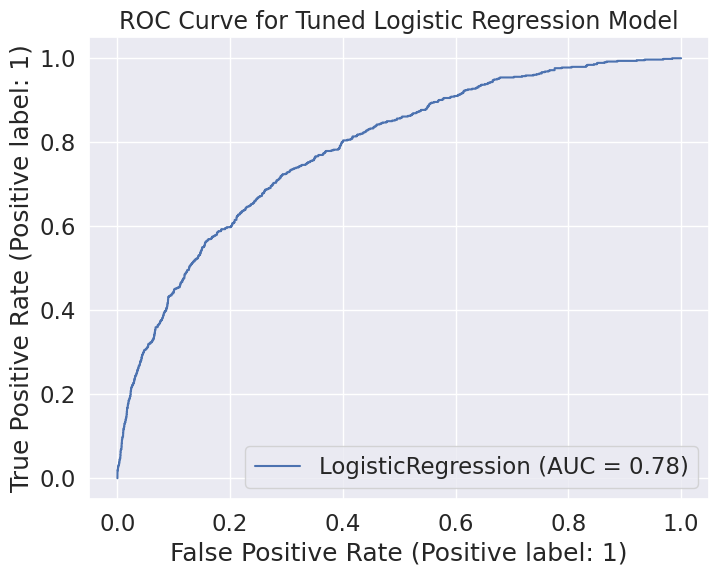

In [ ]:
# evaluating the model
evaluate_model(logreg_gridmodel,X_train_final,X_test_final,y_test,title='Tuned Logistic Regression Model')

Grid search didn't improve model performance.

Logistic regression does a fair job at capturing the depressed class with accurately categorizing 67-68% of those entries. It does a better job at the not depressed class.

The model is able to distinguish fairly well between the classes with an AUC score of .78-.79 which means that it can distinguish between the classes about 78-79% of the time.

The elastic net model doesn't do any better than without the elastic net penalty.

**Random Forest**


---



**Base Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating the classifier
forest_clf=RandomForestClassifier(n_jobs=-1,random_state=123,class_weight='balanced')
# fitting to the training data
forest_base=forest_clf.fit(X_train_final,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Base Random Forest
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.92      0.99      0.95      6618
    depressed       0.54      0.06      0.11       634

     accuracy                           0.91      7252
    macro avg       0.73      0.53      0.53      7252
 weighted avg       0.88      0.91      0.88      7252

__________________________________________________________________


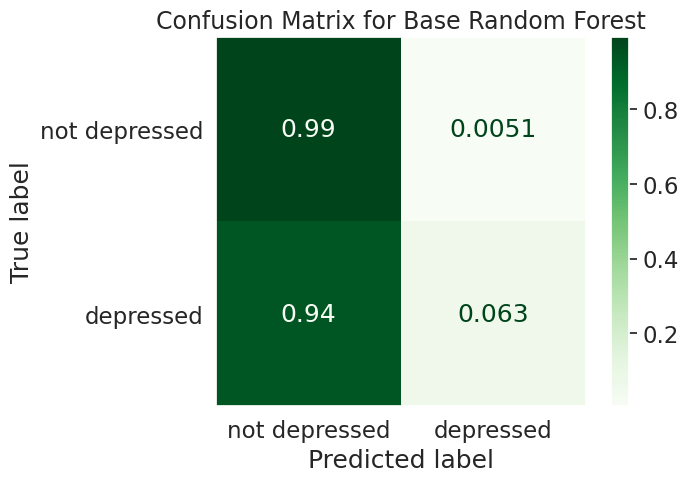

__________________________________________________________________


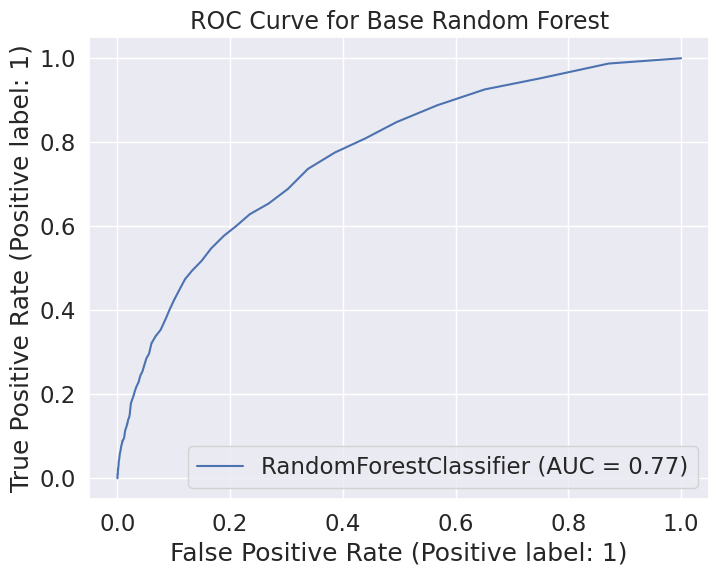

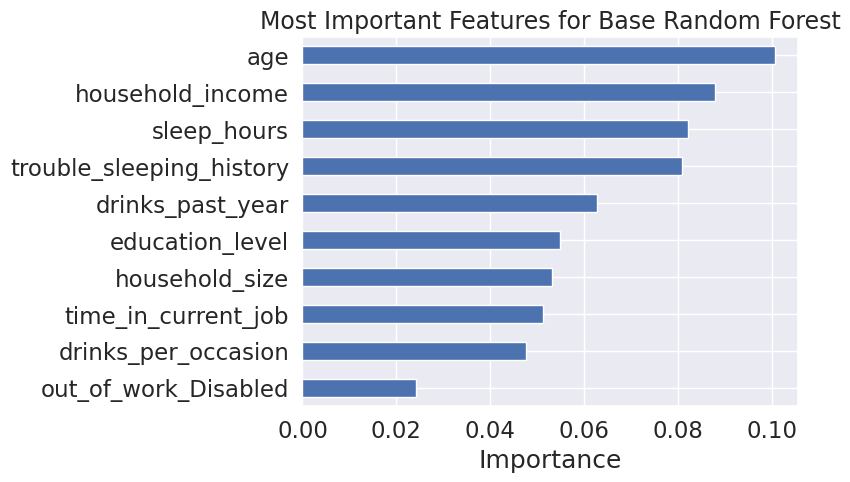

In [ ]:
# evaluating the model
evaluate_model(forest_base,X_train_final,X_test_final,y_test,tree=True,title='Base Random Forest')

**Grid Search**

In [ ]:
# listing the parameters
forest_params={'criterion':['gini','entropy'],'max_depth':[None,5,10,20,50],'min_samples_leaf':[1,10,20],
               'max_features':['auto',None],'class_weight':['balanced','balanced_subsample'],
               'max_samples':[None,.5,.7,.9]}
# creating the classifier
forest_clf=RandomForestClassifier(random_state=123)
# feeding the parameters into the grid
grid=GridSearchCV(forest_clf,forest_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
forest_grid=grid.fit(X_train_final,y_train)

In [ ]:
# listing the parameters
forest_params={'max_depth':[10,15],'min_samples_leaf':[15,20,25,30],'max_samples':[None,.3,.95]}
# creating the classifier
forest_clf=RandomForestClassifier(random_state=123,criterion='entropy',class_weight='balanced',max_features='auto')
# feeding the parameters into the grid
grid=GridSearchCV(forest_clf,forest_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
forest_grid2=grid.fit(X_train_final,y_train)

In [ ]:
# the tuned model
forest_gridmodel=forest_grid2.best_estimator_

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Random Forest Tuned Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.80      0.87      6618
    depressed       0.23      0.63      0.34       634

     accuracy                           0.78      7252
    macro avg       0.59      0.71      0.60      7252
 weighted avg       0.89      0.78      0.82      7252

__________________________________________________________________


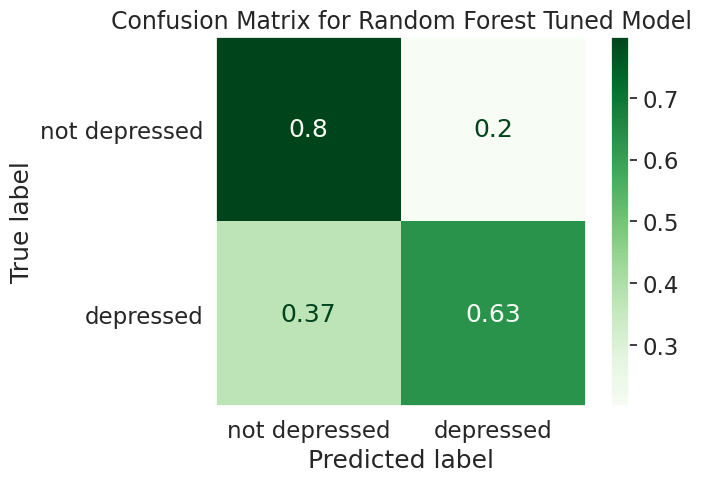

__________________________________________________________________


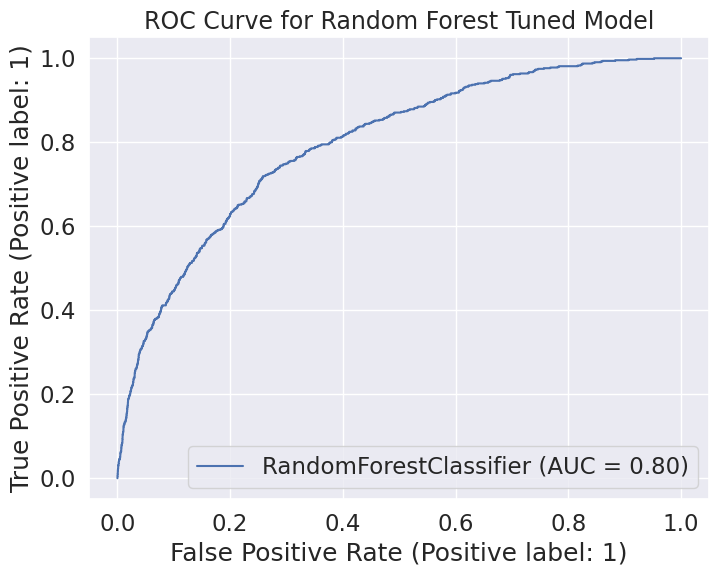

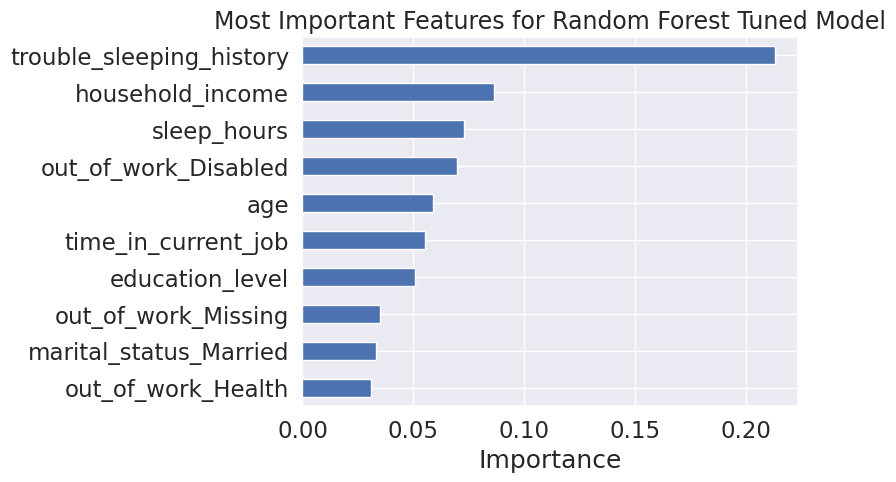

In [ ]:
# evaluating the model
evaluate_model(forest_gridmodel,X_train_final,X_test_final,y_test,tree=True,title='Random Forest Tuned Model')

The base model is not the best since it is maximizing accuracy and picking the dominant class.

The tuned model is worse at predicting the depressed class than logistic regression.

The AUC score shows that the model is able to distinguish between classes about 80% of the time which is better than logistic regression.

**Linear SVM**


---



**Base Model**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
# creating the classifier
svm_clf=LinearSVC(random_state=123,dual=False,class_weight='balanced')
# fitting to the training data
svm_base=svm_clf.fit(X_train_final,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Linear SVM Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.75      0.84      6618
    depressed       0.20      0.66      0.31       634

     accuracy                           0.75      7252
    macro avg       0.58      0.71      0.58      7252
 weighted avg       0.89      0.75      0.80      7252

__________________________________________________________________


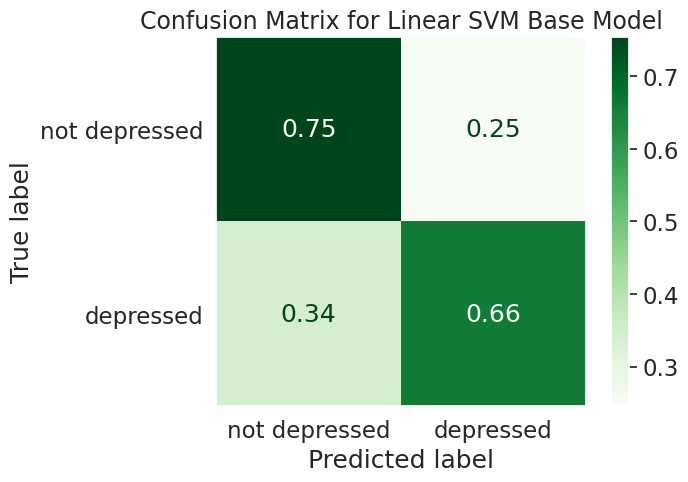

__________________________________________________________________


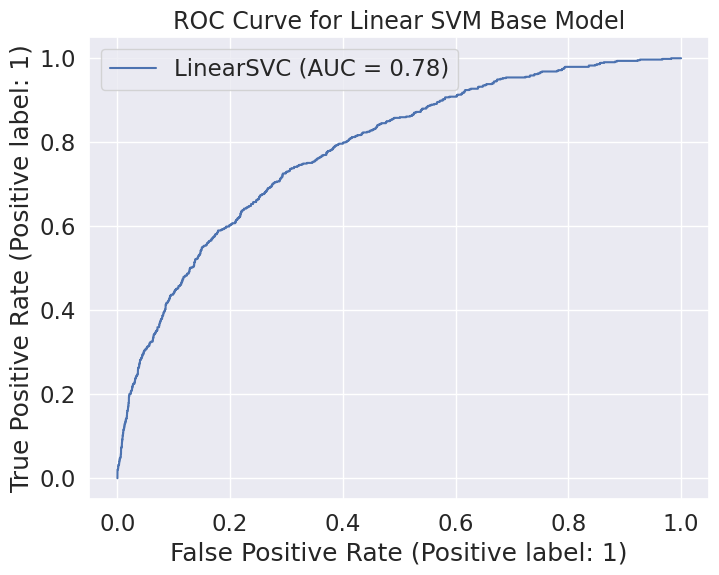

In [ ]:
# evaluating the model
evaluate_model(svm_base,X_train_final,X_test_final,y_test,title='Linear SVM Base Model')

**Grid Search**

In [ ]:
# listing the parameters
svm_params={'C':[1,10,50,100],'fit_intercept':[True,False]}
# creating the classifier
svm_clf=LinearSVC(random_state=123,dual=False,class_weight='balanced')
# feeding the parameters into the grid
grid=GridSearchCV(svm_clf,svm_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
svm_grid=grid.fit(X_train_final,y_train)

In [ ]:
# listing the parameters
svm_params={'C':[.00001,.0001,.001,.01,.1,1,5]}
# creating the classifier
svm_clf=LinearSVC(random_state=123,fit_intercept=False,dual=False,class_weight='balanced')
# feeding the parameters into the grid
grid=GridSearchCV(svm_clf,svm_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
svm_grid2=grid.fit(X_train_final,y_train)

In [ ]:
# the tuned model
svm_gridmodel=svm_grid2.best_estimator_

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Tuned Linear SVM Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.76      0.85      6618
    depressed       0.21      0.66      0.32       634

     accuracy                           0.75      7252
    macro avg       0.58      0.71      0.58      7252
 weighted avg       0.89      0.75      0.80      7252

__________________________________________________________________


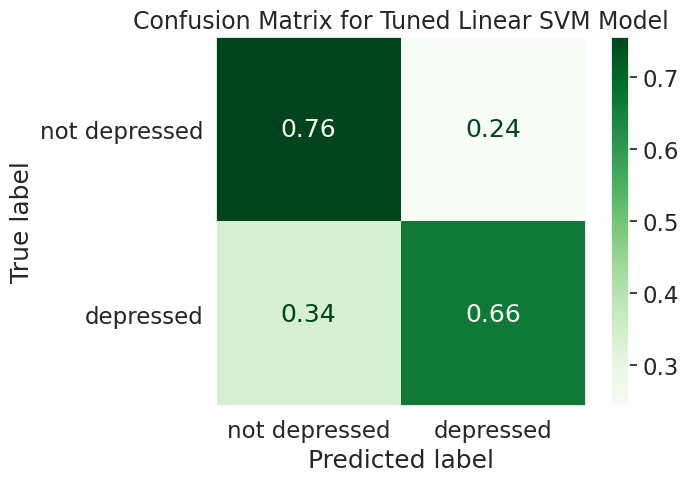

__________________________________________________________________


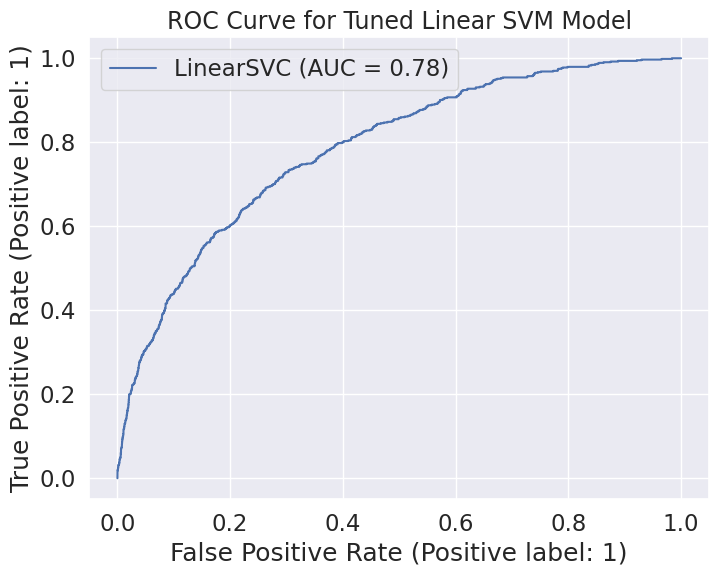

In [ ]:
# evaluating the model
evaluate_model(svm_gridmodel,X_train_final,X_test_final,y_test,title='Tuned Linear SVM Model')

The tuned model has similar performance as logistic regression.

The AUC score is .78.

**Stochastic Gradient Descent Linear Classifier**


---



**Original Preprocessing**

Base Model

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,class_weight='balanced')
# fitting to the training data
sgd_base=sgd_clf.fit(X_train_final,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.95      0.86      0.90      6618
    depressed       0.25      0.50      0.34       634

     accuracy                           0.83      7252
    macro avg       0.60      0.68      0.62      7252
 weighted avg       0.89      0.83      0.85      7252

__________________________________________________________________


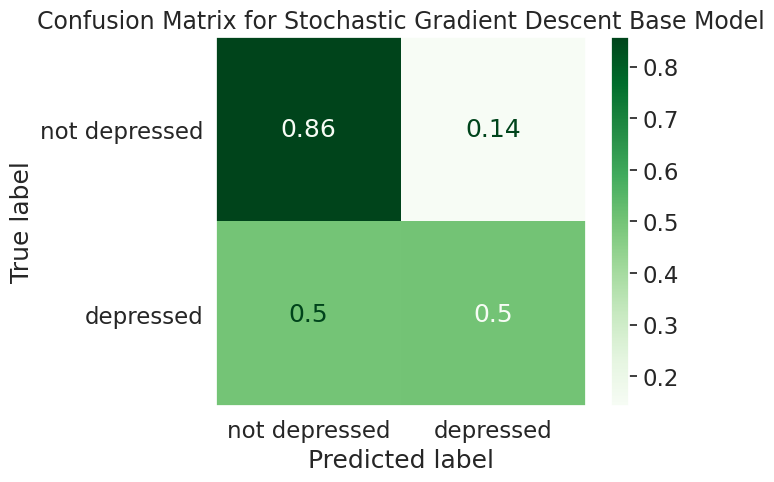

__________________________________________________________________


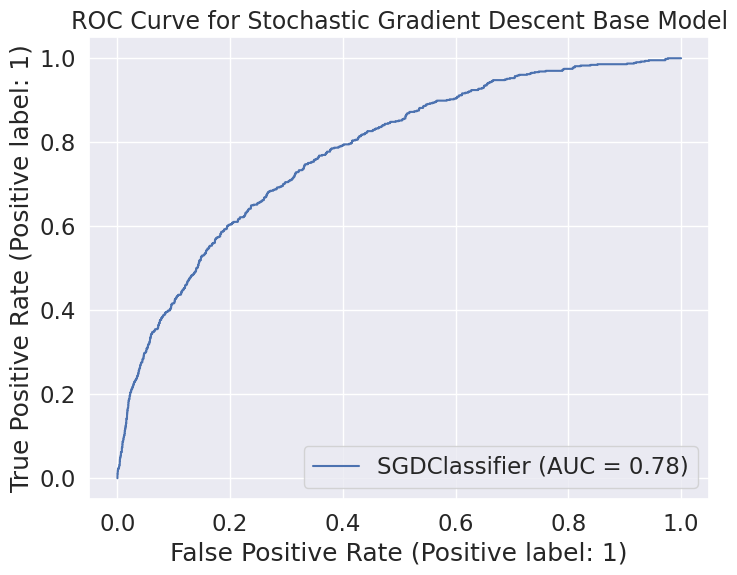

In [ ]:
# evaluating the model
evaluate_model(sgd_base,X_train_final,X_test_final,y_test,title='Stochastic Gradient Descent Base Model')

Grid Search

In [ ]:
# listing the parameters
sgd_params={'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],'penalty':['l2','l1','elasticnet'],
            'fit_intercept':[True,False],'alpha':[.01,.001,.0001,.00001]}
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,class_weight='balanced')
# feeding the parameters into the grid
grid_final=GridSearchCV(sgd_clf,sgd_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
sgd_grid_final=grid_final.fit(X_train_final,y_train)

In [ ]:
# listing the parameters
sgd_params={'alpha':[1,.5,.1,.05,.01,.005]}
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,fit_intercept=True,loss='log',penalty='elasticnet',l1_ratio=.4,
                      class_weight='balanced')
# feeding the parameters into the grid
grid_final2=GridSearchCV(sgd_clf,sgd_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
sgd_grid_final2=grid_final2.fit(X_train_final,y_train)

In [ ]:
# the tuned model
sgd_grid_finalmodel=sgd_grid_final2.best_estimator_

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.77      0.85      6618
    depressed       0.21      0.65      0.32       634

     accuracy                           0.76      7252
    macro avg       0.58      0.71      0.58      7252
 weighted avg       0.89      0.76      0.80      7252

__________________________________________________________________


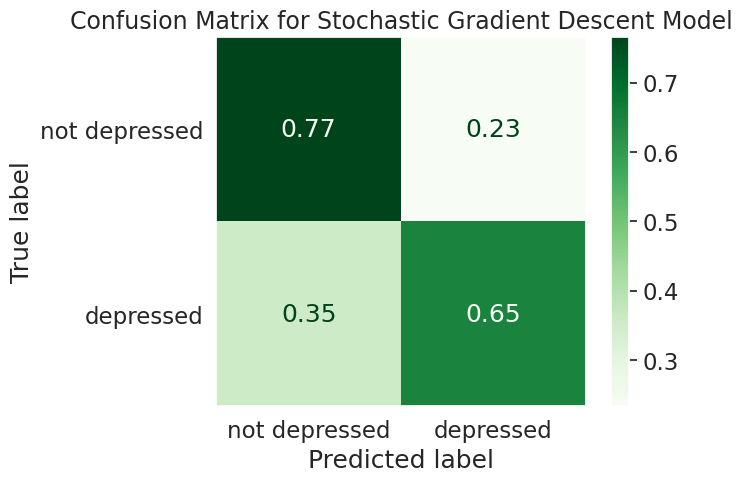

__________________________________________________________________


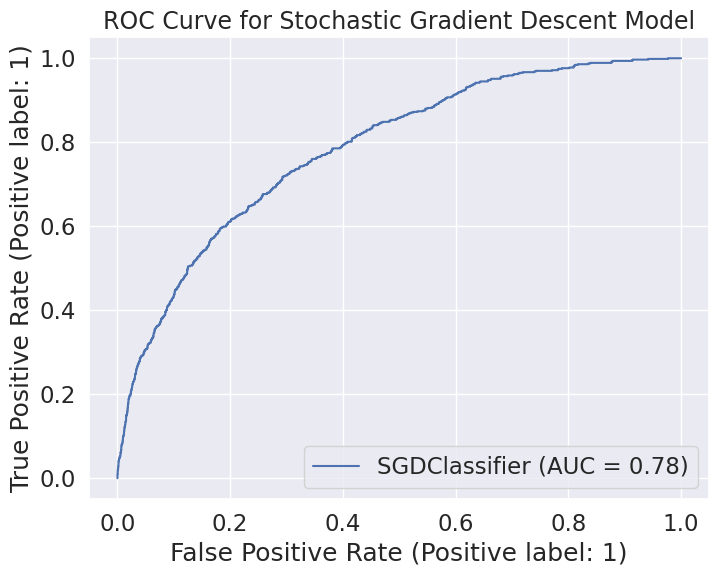

In [ ]:
# evaluating the model
evaluate_model(sgd_grid_finalmodel,X_train_final,X_test_final,y_test,title='Stochastic Gradient Descent Model')

**Standard Scaling**

Rescaling Data

In [ ]:
# initiating the scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
# fitting the scaler
scale_train=scaler.fit_transform(X_train[scale_cols])
scale_test=scaler.transform(X_test[scale_cols])

In [ ]:
# turning the scaled data into dataframes
scale_train_df=pd.DataFrame(scale_train,columns=X_train[scale_cols].columns,index=X_train.index)
scale_test_df=pd.DataFrame(scale_test,columns=X_train[scale_cols].columns,index=X_test.index)

In [ ]:
# combining the data back together
X_train_scale=pd.concat([ohe_train_df,scale_train_df,kmeans_train],axis=1)
X_test_scale=pd.concat([ohe_test_df,scale_test_df,kmeans_test],axis=1)

Base Model

In [ ]:
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,class_weight='balanced',loss='log')
# fitting to the training data
sgd_scaled=sgd_clf.fit(X_train_scale,y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.95      0.82      0.88      6618
    depressed       0.23      0.56      0.33       634

     accuracy                           0.80      7252
    macro avg       0.59      0.69      0.60      7252
 weighted avg       0.89      0.80      0.83      7252

__________________________________________________________________


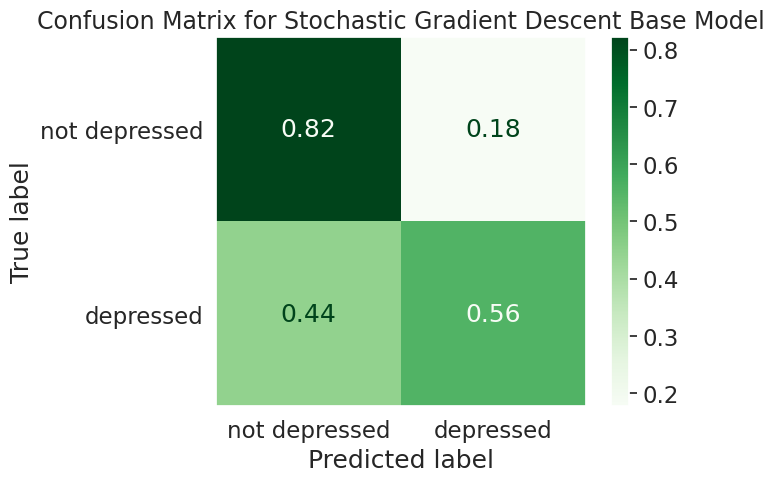

__________________________________________________________________


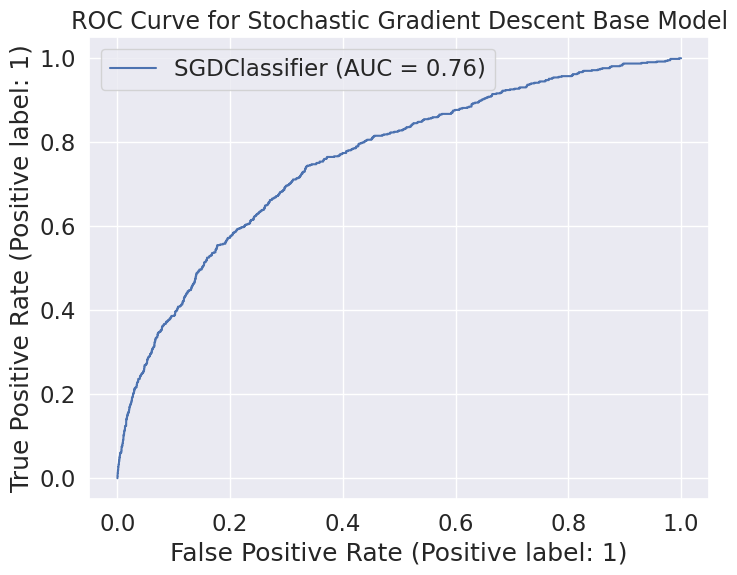

In [ ]:
# evaluating the model
evaluate_model(sgd_scaled,X_train_scale,X_test_scale,y_test,title='Stochastic Gradient Descent Base Model')

Grid Search

In [ ]:
# listing the parameters
sgd_params={'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],'penalty':['l2','l1','elasticnet'],
            'fit_intercept':[True,False],'alpha': [.01,.001,.0001,.00001]}
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,class_weight='balanced')
# feeding the parameters into the grid
grid_scaled=GridSearchCV(sgd_clf,sgd_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
sgd_grid_scaled=grid_scaled.fit(X_train_scale,y_train)

In [ ]:
# listing the parameters
sgd_params={'alpha':[1,.5,.1,.05,.01,.005]}
# creating the classifier
sgd_clf=SGDClassifier(random_state=123,n_jobs=-1,loss='log',penalty='elasticnet',fit_intercept=False,l1_ratio=.4,
                      class_weight='balanced')
# feeding the parameters into the grid
grid_scaled2=GridSearchCV(sgd_clf,sgd_params,scoring=f2_scorer,n_jobs=-1,cv=3)
# fitting to the training data
sgd_grid_scaled2=grid_scaled2.fit(X_train_scale,y_train)

In [ ]:
# the tuned model
sgd_grid_scaled=sgd_grid_scaled2.best_estimator_

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.74      0.84      6618
    depressed       0.20      0.67      0.31       634

     accuracy                           0.74      7252
    macro avg       0.58      0.71      0.57      7252
 weighted avg       0.89      0.74      0.79      7252

__________________________________________________________________


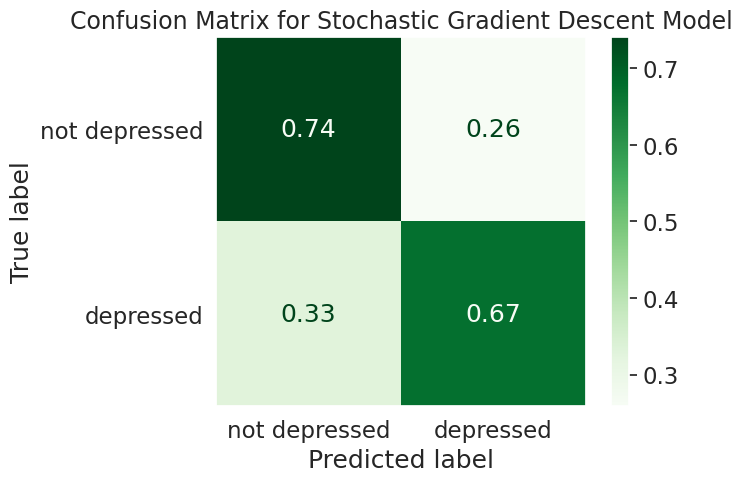

__________________________________________________________________


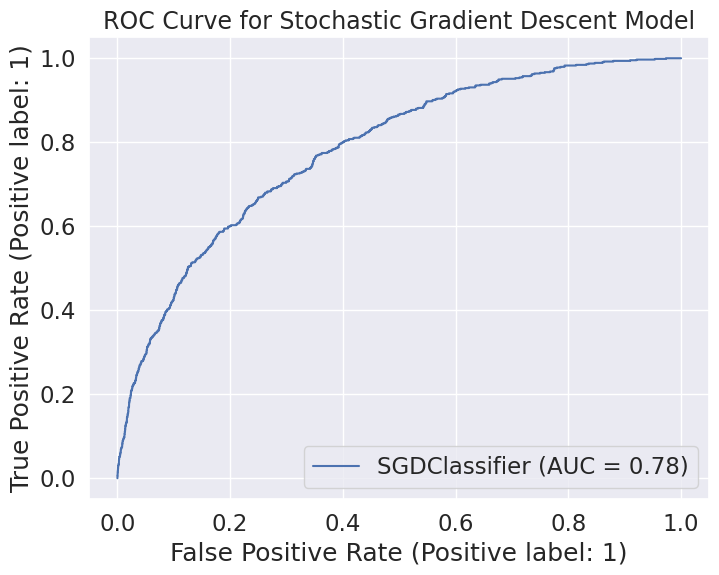

In [ ]:
# evaluating the model
evaluate_model(sgd_grid_scaled,X_train_scale,X_test_scale,y_test,title='Stochastic Gradient Descent Model')

Using the gradient descent classifier did not increase model performance by a good amount.

The model with the original preprocessing better.